# Capstone Title: Who will say yes?

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data set : https://archive.ics.uci.edu/ml/datasets/bank+marketing

## What files am I uploading and why?

- I imported numpy, pandas, seaborn, matpotlib and statsmodels as part of my data analysis.

- I imported four libraries from sklearn as part of my machine learning.

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mp
import seaborn as sns

In [15]:
import statsmodels.api as sm # Ordinary Least Squares (OLS) Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [17]:
df = pd.read_csv('data/bank-additional-full.csv')
dftest = pd.read_csv('data/bank-additional.csv')
#df['month'] = df['month'].astype('monthtime64[ns]')
#df['month'] = df['DateTime'].dt.date
#new_date = pd.to_datetime(df.month)

# Exploratory Data Analysis

Here I am performing an initial investigation on this data set to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.


In [7]:
dftest.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [9]:
df.value_counts

<bound method DataFrame.value_counts of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         co

In [308]:
# Change yes and no to 1 and 2

#import pandas as pd
#data = {'yes_no': ['y', 'y', 'n', 'y', 'n']}
#df = pd.DataFrame(data)
#df['new_column'] = df['yes_no'].apply(lambda x: 'True' if x == 'y' else 'False')
#print(df)

# Change to Binary
- I'm changing these two columns to binary; because I will do a predictive model (machine learning) after my analysis.
- column 'y' change to binary
- column 'house' change to binary

In [33]:
#import pandas as pd
# df = pd.DataFrame(data) # this will over rided by my dataframe

#df['yBinary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
#print(df)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact  year month  ... pdays  previous  

In [310]:
# Drop unknown from the housing column, change my mind

# Change to binary

#df['housingBinary'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
#print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact  year month  ... previous     pout

In [260]:
# Check columns housing and housingBinary to make sure 
# the yes/no match 1/0

#df.head(5) 


,age,job,marital,education,default,housing,loan,contact,year,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yBinary,housingBinary
0,56,housemaid,married,basic.4y,no,no,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,no,yes,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0


# Additional Exploratory Data Analysis


In [8]:
df.shape

(41188, 22)

In [262]:
dftest.shape


(4119, 21)

In [263]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'year', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'yBinary',
       'housingBinary'],
      dtype='object')

In [264]:
df.describe()


,age,year,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yBinary,housingBinary
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2008.377683,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,0.523842
std,10.42125,0.578773,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,0.499437
min,17.00000,2008.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,2008.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000
50%,38.00000,2008.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000
75%,47.00000,2009.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000
max,98.00000,2010.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000


In [265]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   year            41188 non-null  int64  
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

In [266]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,year,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yBinary,housingBinary
0,56,housemaid,married,basic.4y,no,no,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,no,yes,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,telephone,2008,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0


In [267]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,year,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yBinary,housingBinary
41183,73,retired,married,professional.course,no,yes,no,cellular,2010,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,2010,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,2010,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1
41186,44,technician,married,professional.course,no,no,no,cellular,2010,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0
41187,74,retired,married,professional.course,no,yes,no,cellular,2010,nov,...,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0,1


# Counts
- Using the histplot count code to further break down each column to have a better understanding of the dataset.  

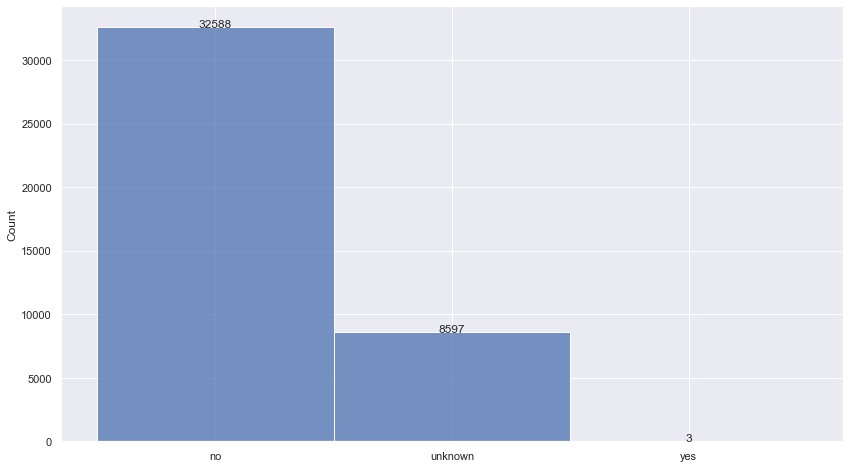

In [268]:
x = df['default'].values      # Default column
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

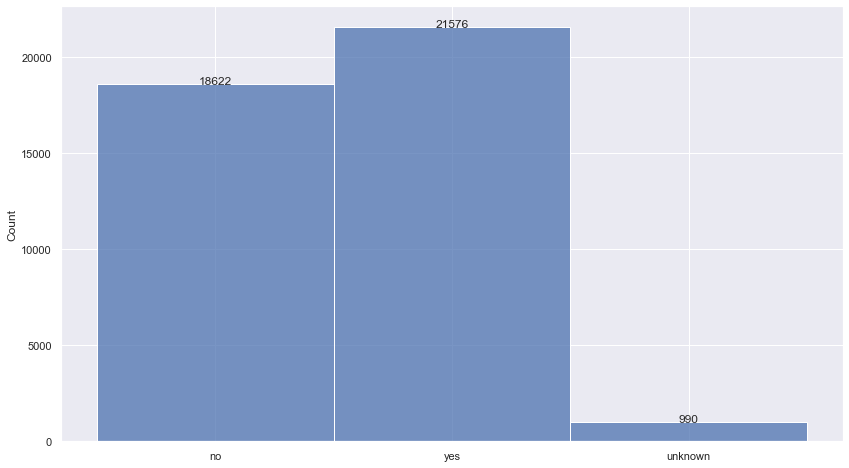

In [269]:
x = df['housing'].values        # Housing column
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2, 
 s = '{:.0f}'.format(height), 
 ha = 'center') 

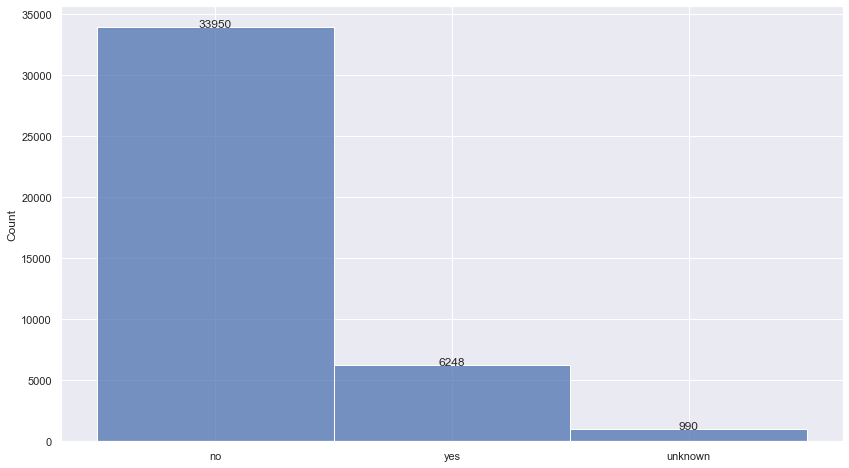

In [270]:
x = df['loan'].values             # Loan column
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height()
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2,
 s = '{:.0f}'.format(height), 
 ha = 'center') 

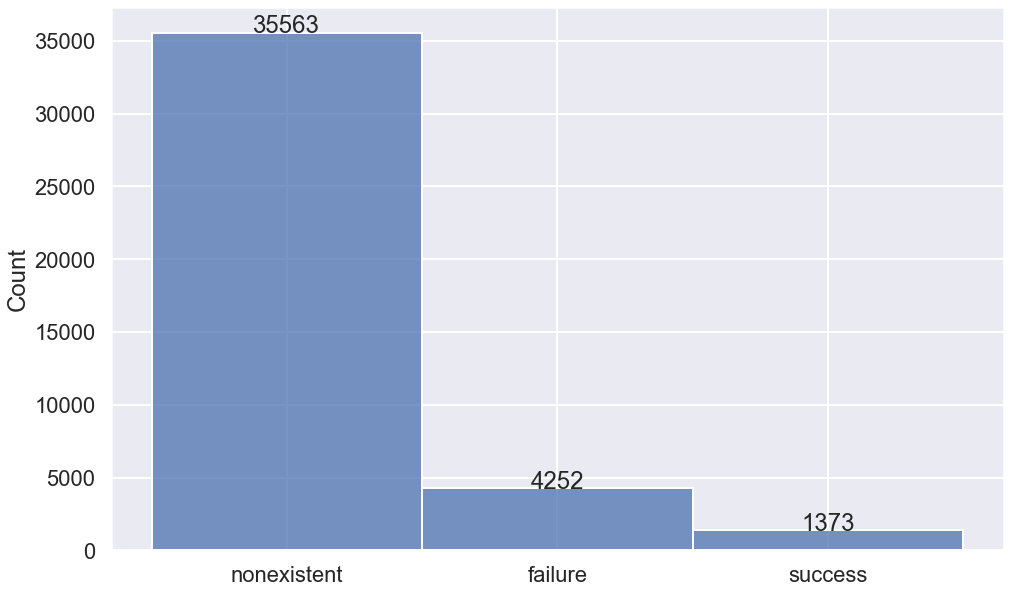

In [271]:
x = df['poutcome'].values                 # poutcome column
sns.set(rc = {'figure.figsize':(16,10)})
sns.set_context('poster')
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2, 
 s = '{:.0f}'.format(height), 
 ha = 'center')


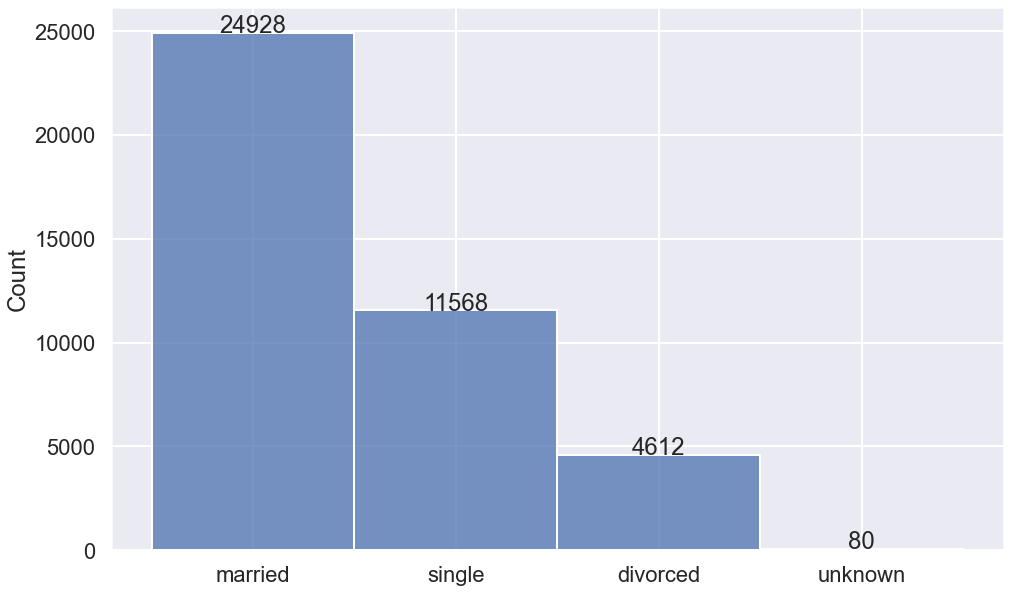

In [272]:
x = df['marital'].values                 # Marital column
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2, 
 s = '{:.0f}'.format(height), 
 ha = 'center') 

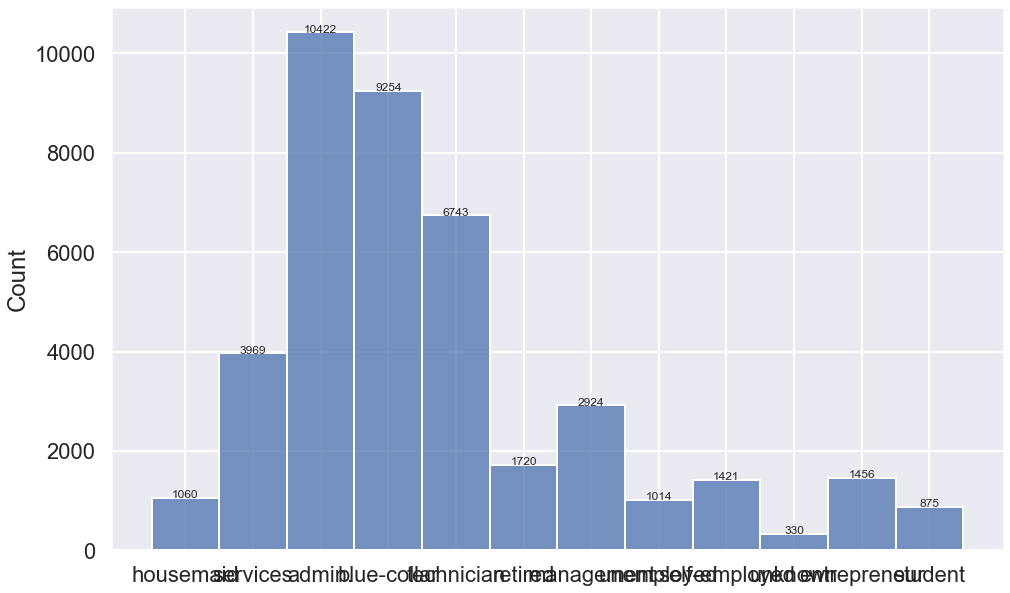

In [273]:
x = df['job'].values                  # Job column
ax = sns.histplot(x = x)
sns.set(rc = {'figure.figsize':(20,10)})

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2,
 s = '{:.0f}'.format(height),
 ha = 'center') 
    

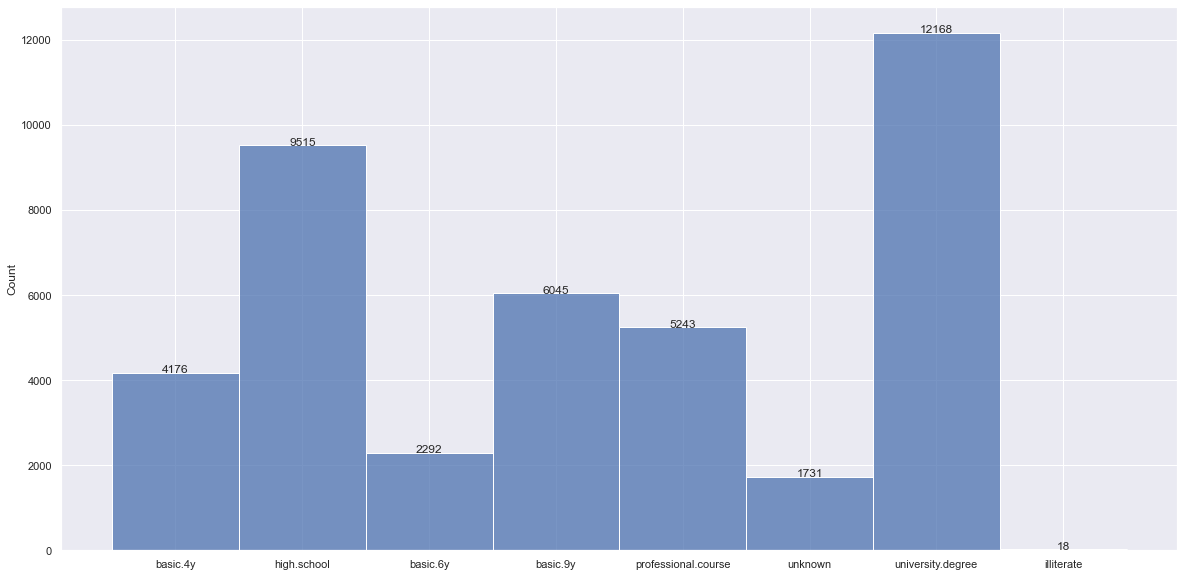

In [274]:
x = df['education'].values             # Education column
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2,
 s = '{:.0f}'.format(height), 
 ha = 'center')

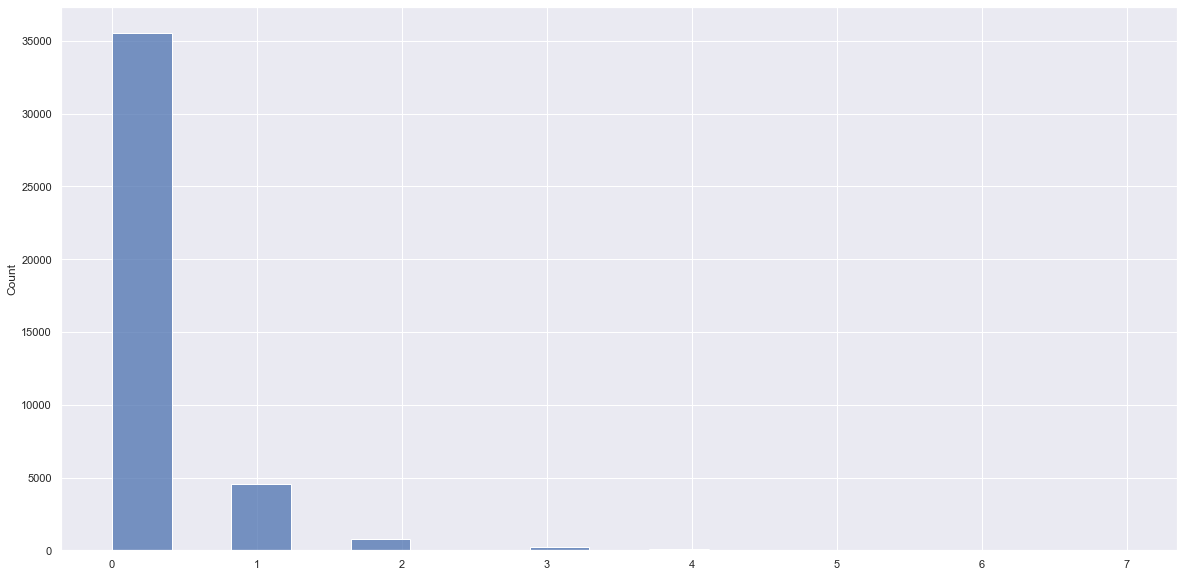

In [275]:
x = df['previous'].values       #  previous: number of contacts performed, Previous column
ax = sns.histplot(x = x)        # before this campaign and for this client (numeric)

# Compare previous calls numbers to this to number of call placed after the campign 

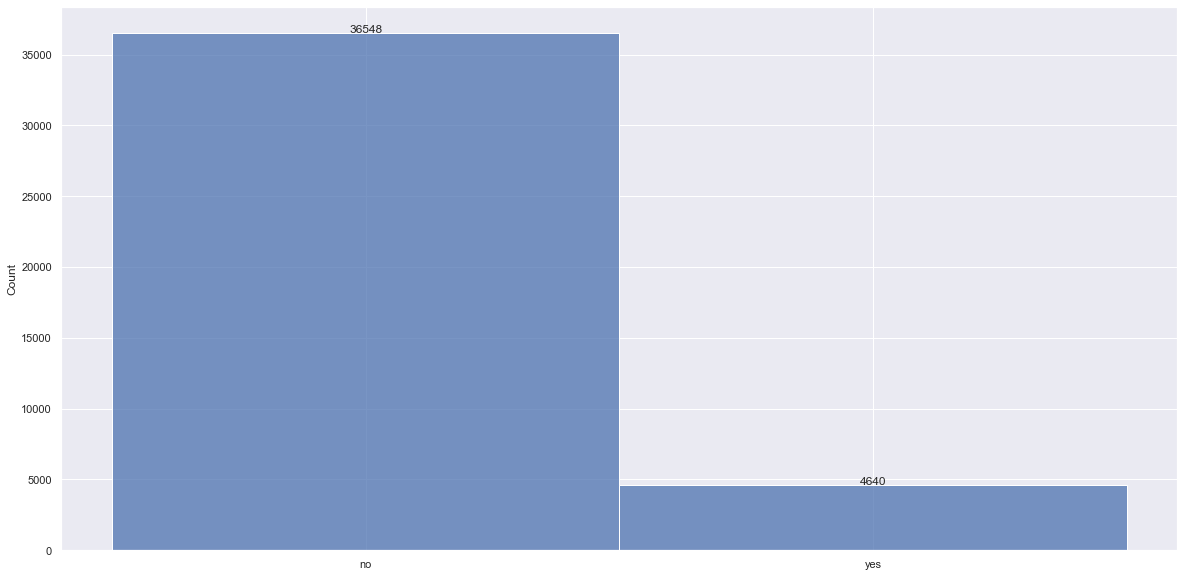

In [276]:
x = df['y'].values                 # y column
ax = sns.histplot(x = x)

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2,
 s = '{:.0f}'.format(height), 
 ha = 'center') 

# Examination of the previous marketing campaign and the current campaign

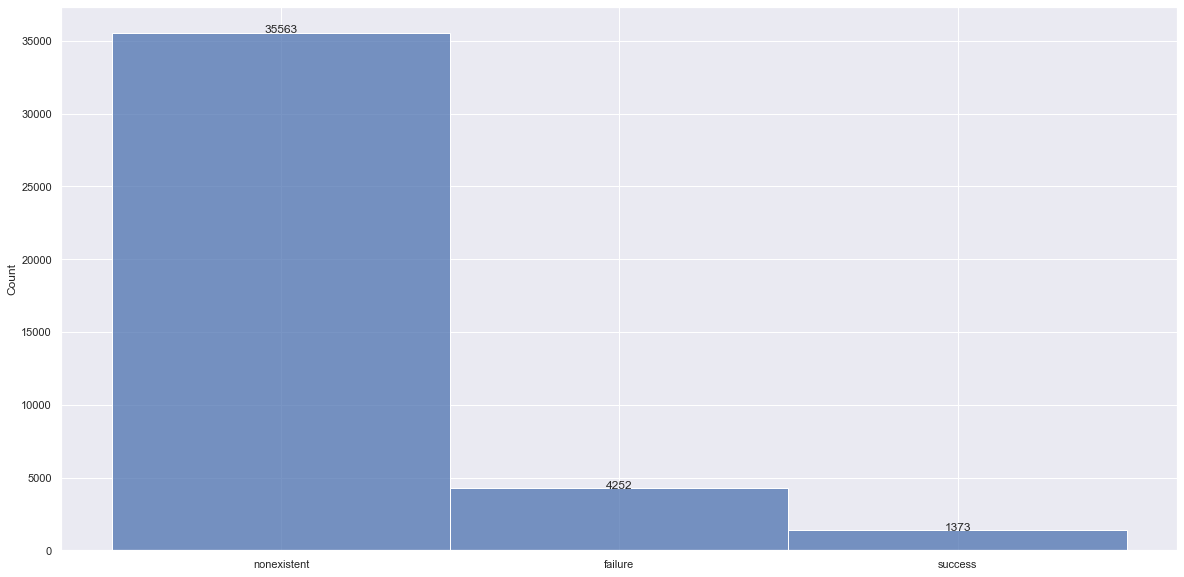

In [277]:
# Outcome of the previous bank marketing campaign

x = df['poutcome'].values
ax = sns.histplot(x = x)
sns.set(rc = {'figure.figsize':(20,10)})

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2,
 s = '{:.0f}'.format(height),
 ha = 'center') 

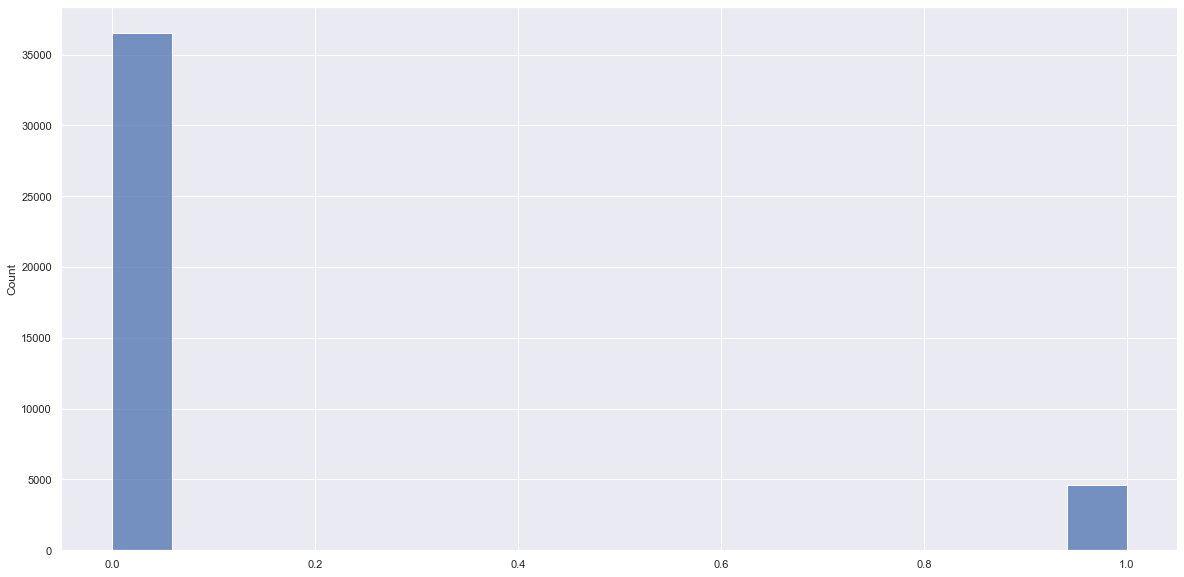

In [278]:
# Outcome of the Current bank marketing campaign
# 0 = no, 1 = yes

x = df['yBinary'].values
ax = sns.histplot(x = x)

#for p in ax.patches:
 #height = p.get_height() 
 #ax.text(x = p.get_x()+(p.get_width()/2), 
 #y = height+0.2, 
 #s = '{:.0f}'.format(height), 
 #ha = 'center') 
    

# Further data mining of the banking campaign

- Exploring the relationships between the campaign and other categories or subcategories.
- **What is campaign?** The number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Compared to job, marital, education, default,housing, and loan


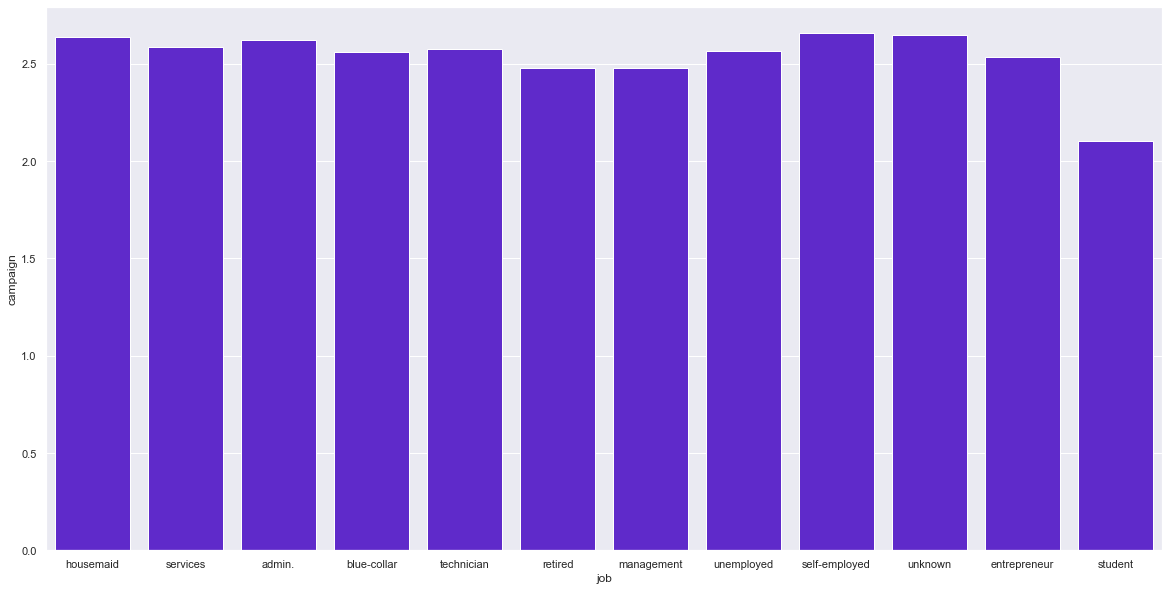

In [279]:
ax = sns.barplot(x = 'job', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False)

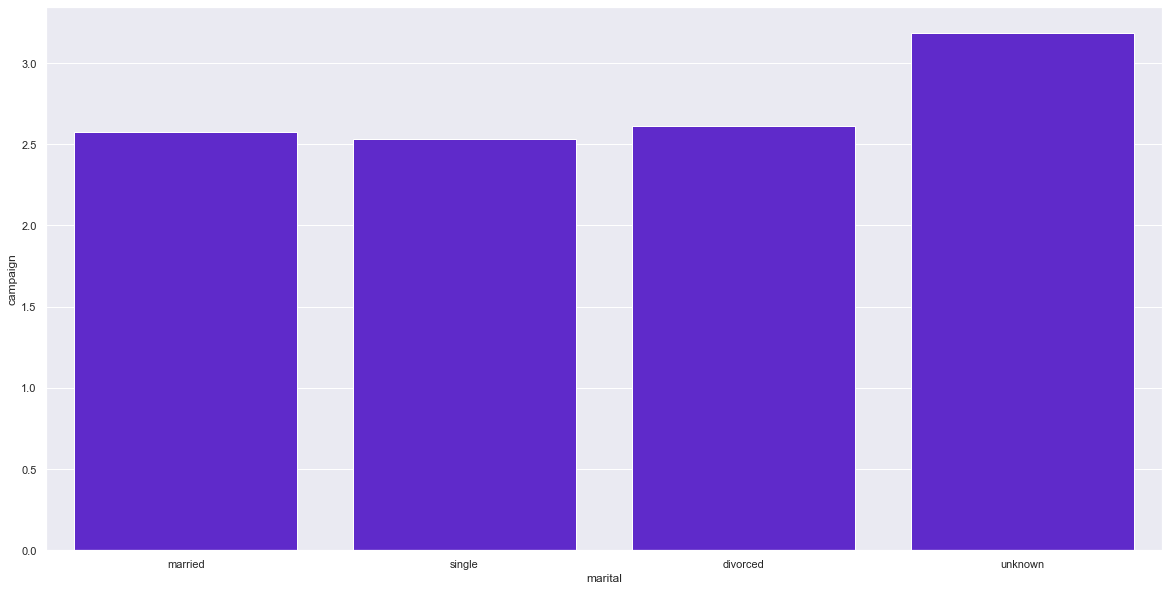

In [280]:
ax = sns.barplot(x = 'marital', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False)

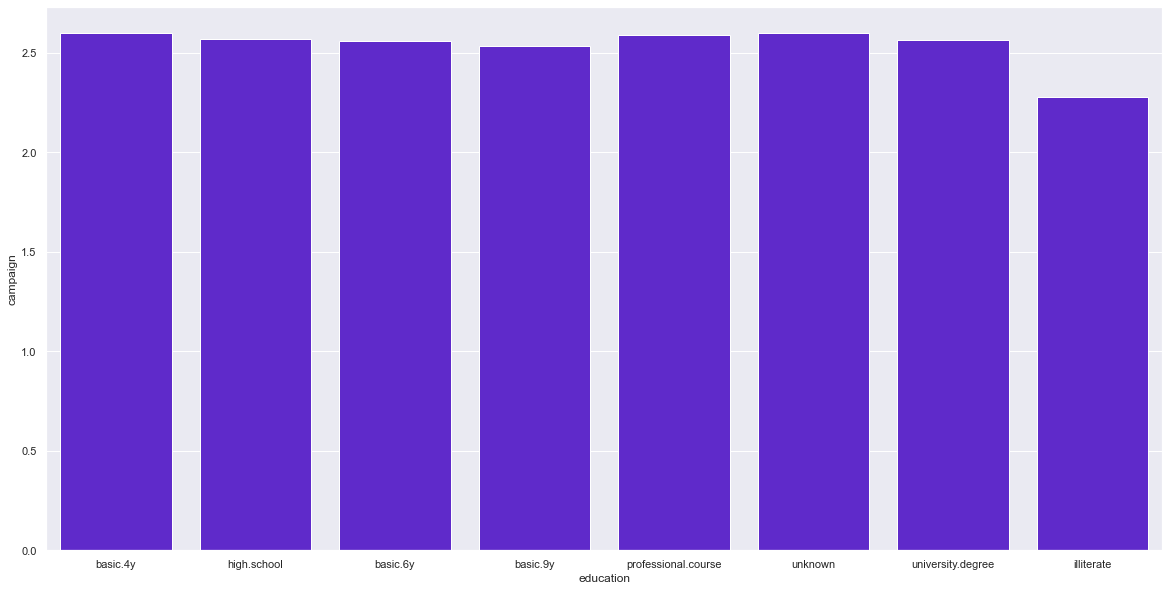

In [281]:
ax = sns.barplot(x = 'education', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False)


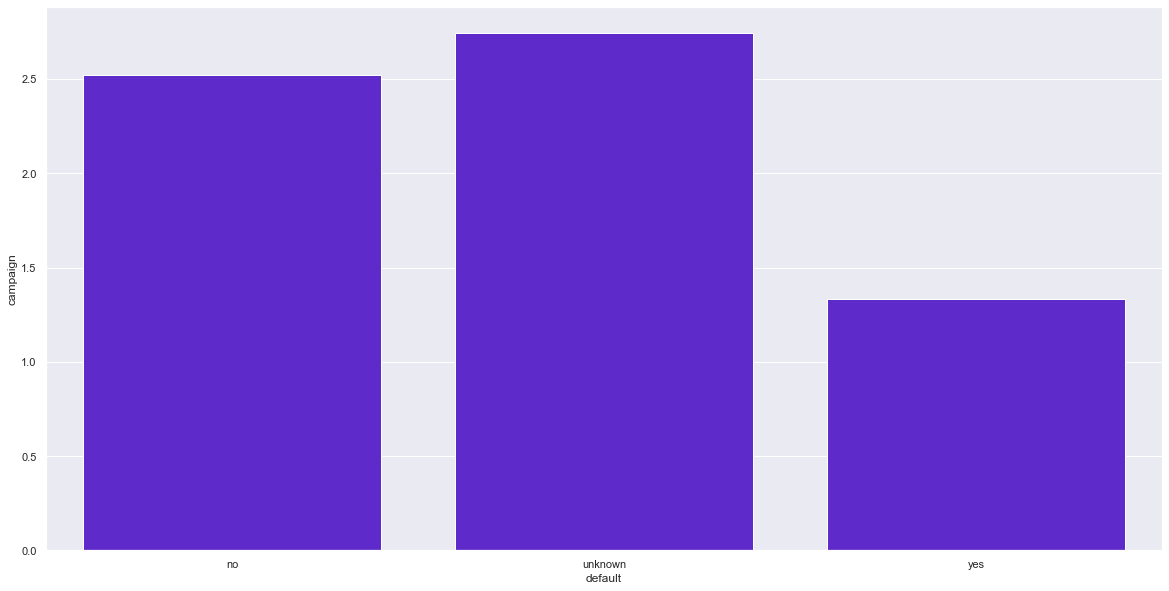

In [282]:
ax = sns.barplot(x = 'default', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False)

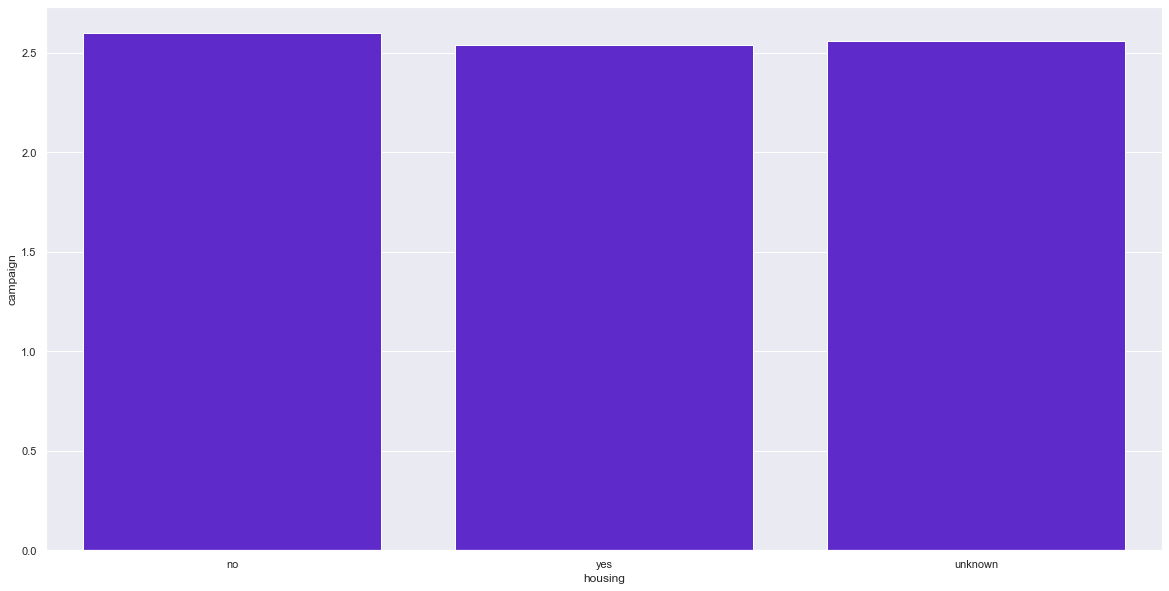

In [283]:
ax = sns.barplot(x = 'housing', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False)

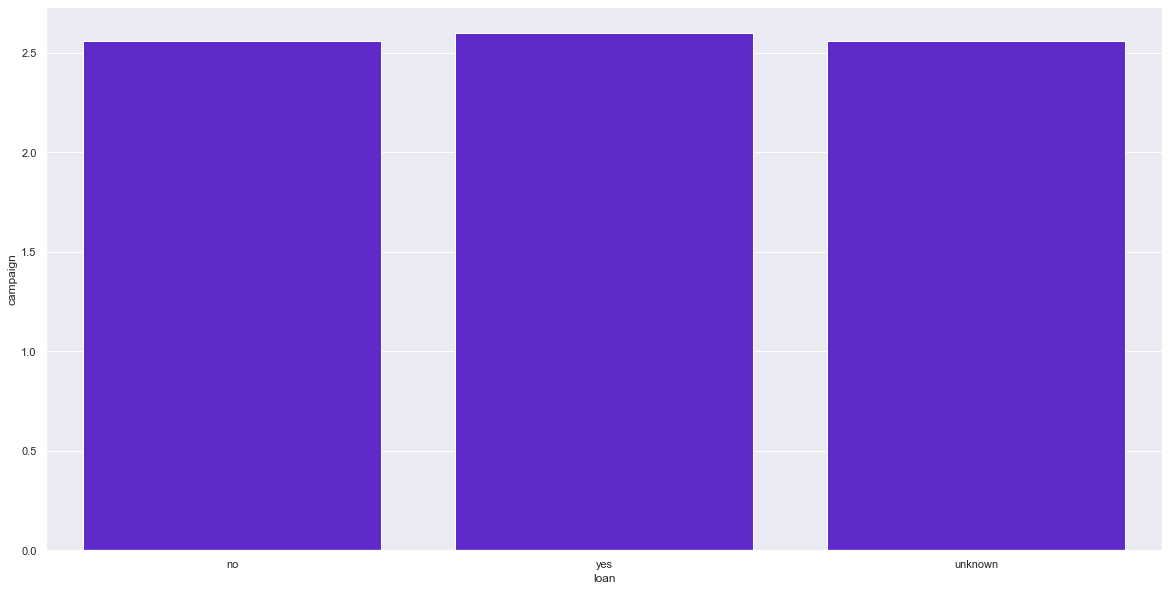

In [284]:
ax = sns.barplot(x = 'loan', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False)

# Duration of the calls placed during campaign 

-  last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- exploring the relationships between the duration of campaign calls and other categories or subcategories.

- Compared to marital, age, and job

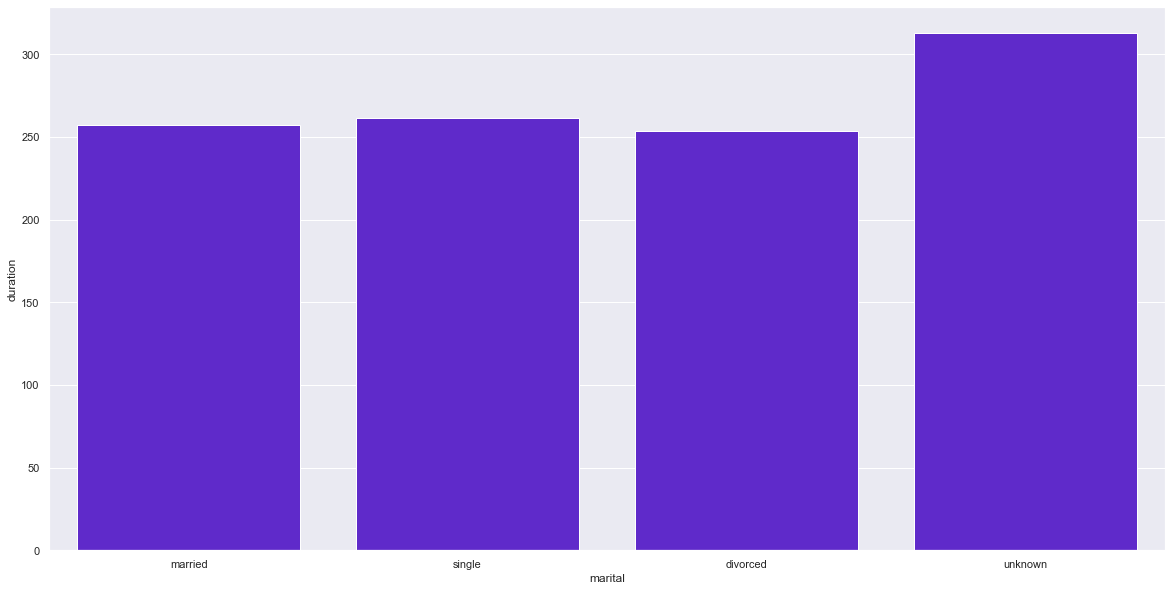

In [285]:
ax = sns.barplot(x = 'marital', y = 'duration', color = '#560FE5', 
                 data = df, ci = False)
# longer you are the phone
# try this in a heatmap

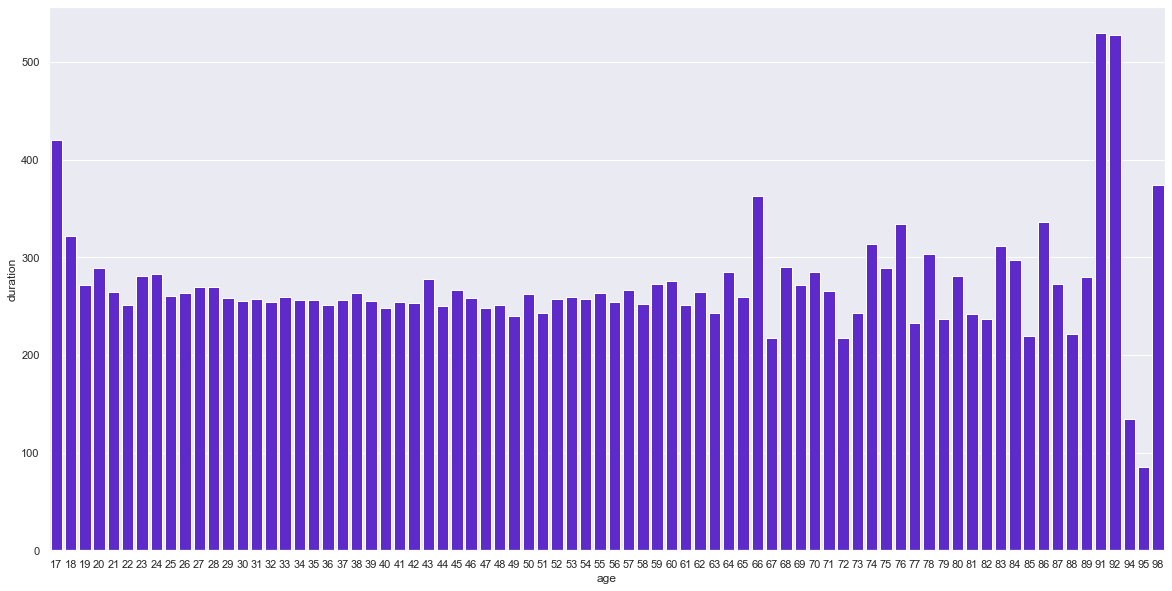

In [286]:
ax = sns.barplot(x = 'age', y = 'duration', color = '#560FE5', 
                 data = df, ci = False)

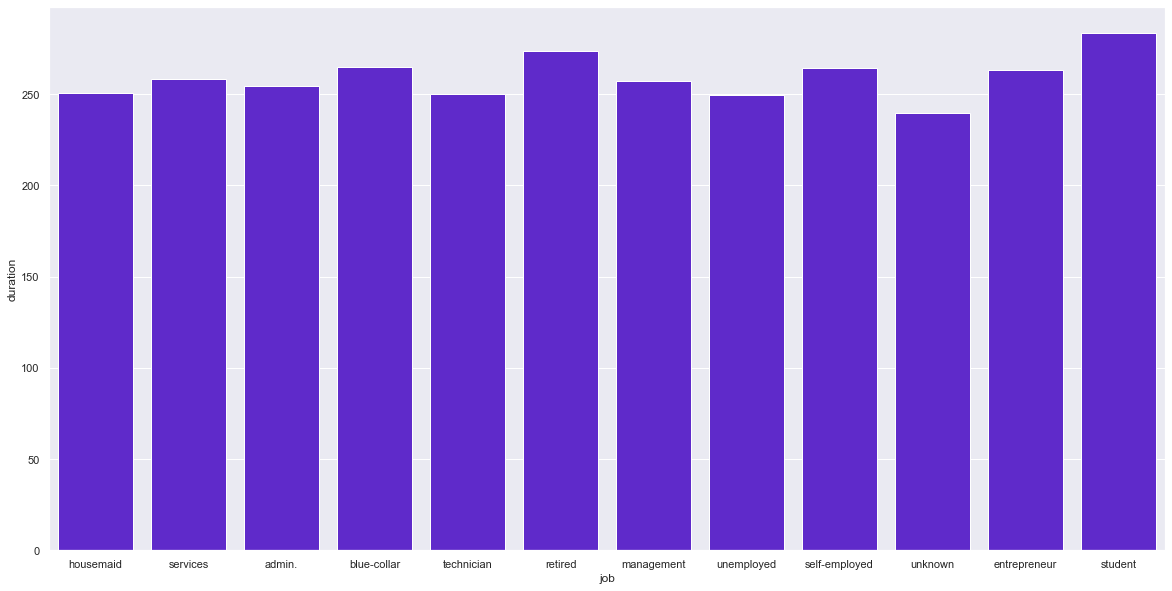

In [287]:
ax = sns.barplot(x = 'job', y = 'duration', color = '#560FE5', 
                 data = df, ci = False)

# Interquartile range 
- show distributions of numeric data values for marital, days of the week and campaign 
- the madian range is 3 calls for both charts, and anything over 5 is a outlier

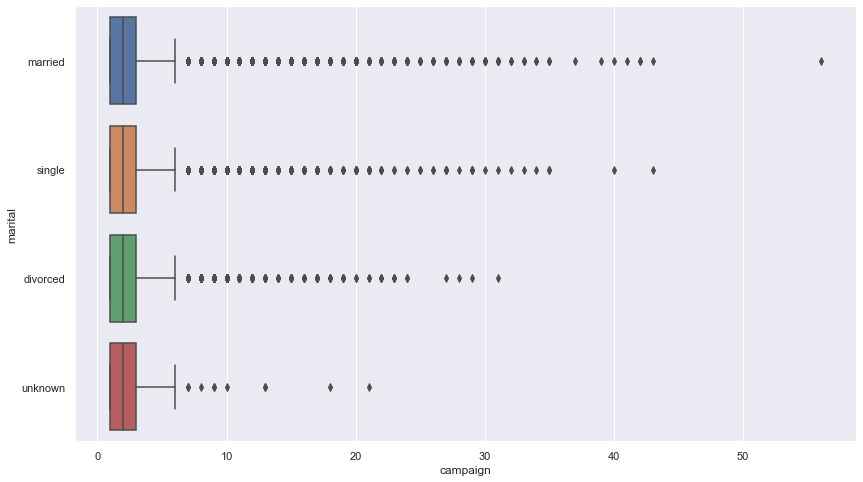

In [288]:
sns.set(rc={'figure.figsize': (14, 8)})
ax = sns.boxplot(x = 'campaign', y = 'marital', data = df)



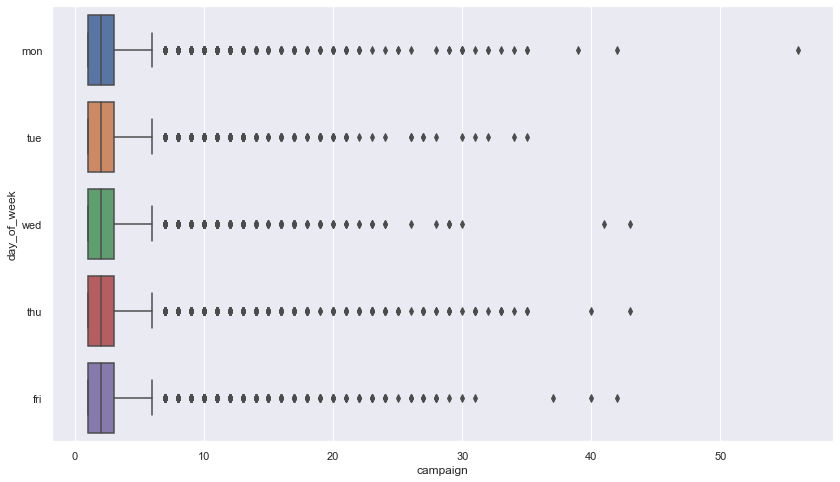

In [289]:
ax = sns.boxplot(x = 'campaign', y = 'day_of_week', data = df)

## Barplot 
- I am using bar plot to campare the difference (and similarities) between categories in the data.



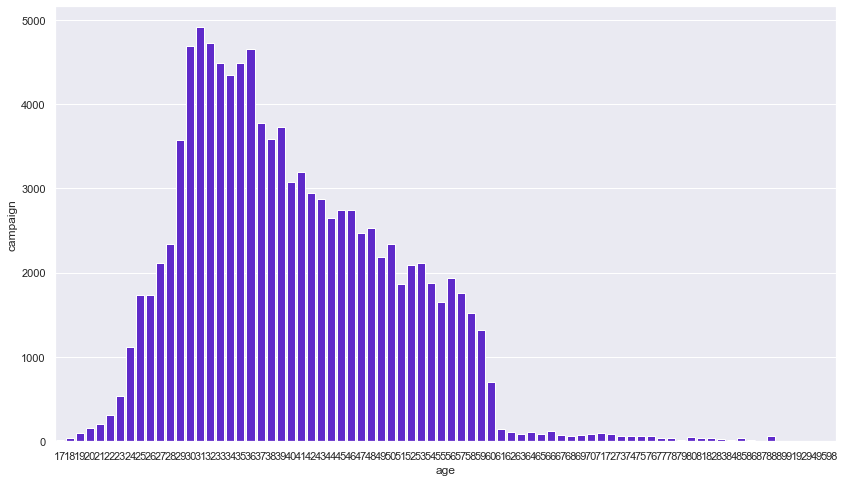

In [295]:
ax = sns.barplot(x = 'age', y = 'campaign', color = '#560FE5', 
                 data = df, ci = False, estimator = sum)

# Try this in a heat map


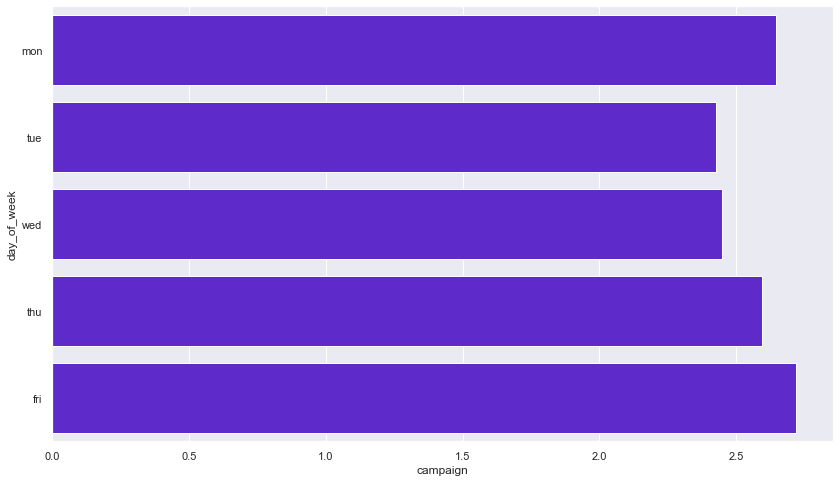

In [296]:
ax = sns.barplot(x = 'campaign', y = 'day_of_week', color = '#560FE5', 
                 data = df, ci = False)

In [1]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='year', y='previous', data = data,
                 errwidth=0,)
ax.bar_label(ax.containers[0]) 

# call place before the campaign over the years, average 


NameError: name 'pd' is not defined

[Text(0, 0, '736'), Text(0, 0, '4171'), Text(0, 0, '2217')]

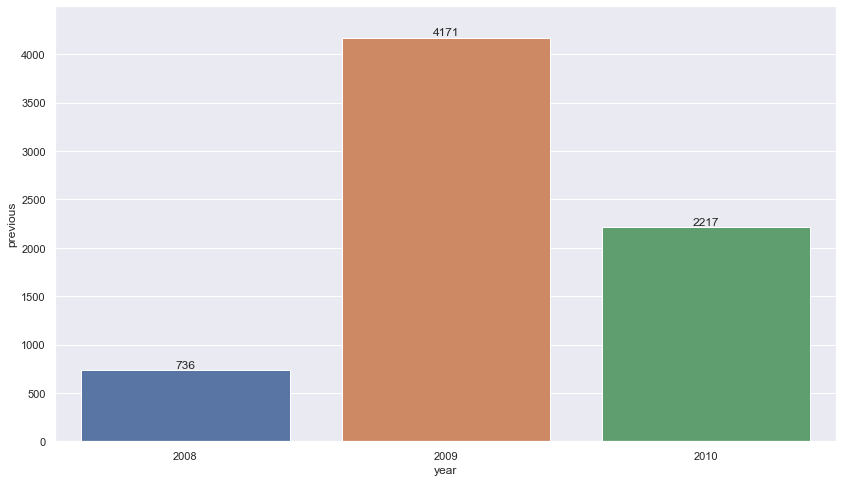

In [298]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='year', y='previous', data=data,
                 errwidth=0,estimator = sum)
ax.bar_label(ax.containers[0]) 

# call place before the campaign over the years, by sum

[Text(0, 0, '2.79931'), Text(0, 0, '2.12587'), Text(0, 0, '1.90525')]

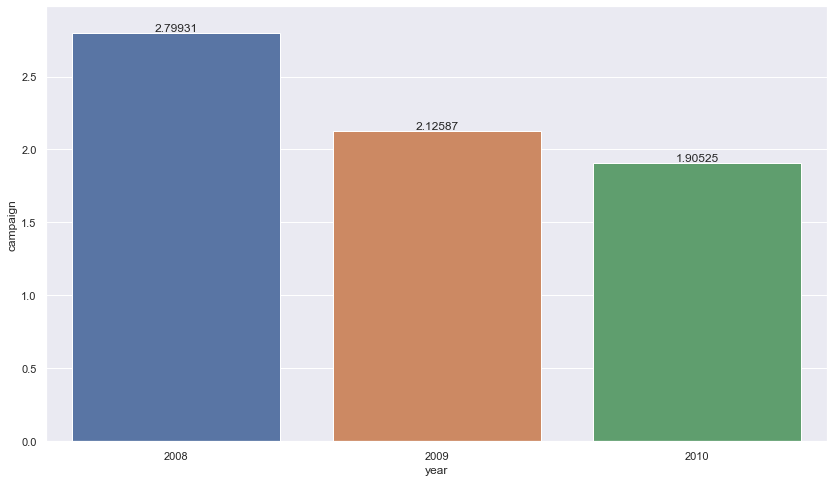

In [299]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='year', y='campaign', data=data,
                 errwidth=0)
ax.bar_label(ax.containers[0]) 

# Calls placed during the campaign over the year, by average
# Maybe use for story, why where calls placed in 2008?

[Text(0, 0, '77513'), Text(0, 0, '24320'), Text(0, 0, '3921')]

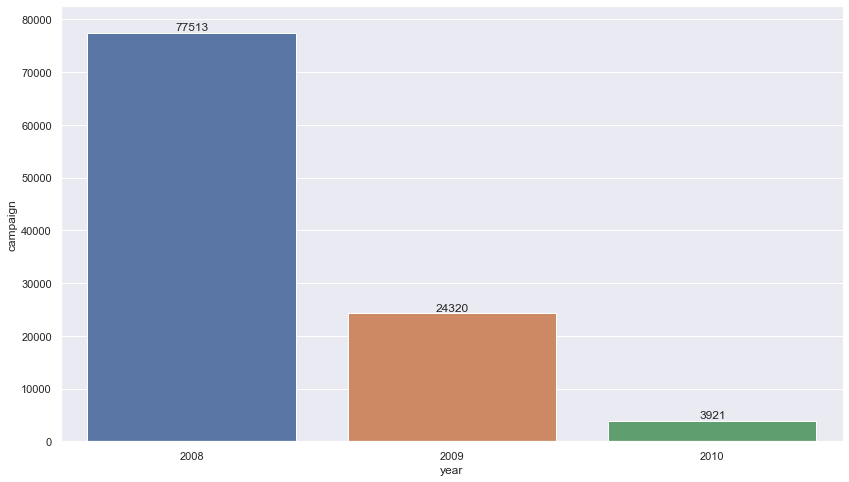

In [300]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='year', y='campaign', data=data,
                 errwidth=0,estimator = sum )
ax.bar_label(ax.containers[0]) 

# Calls placed during the campaign over the year, by sum
# Maybe use for story, why where calls placed in 2008?

[Text(0, 0, '0.164209'),
 Text(0, 0, '0.083114'),
 Text(0, 0, '0.0471146'),
 Text(0, 0, '0.11541'),
 Text(0, 0, '0.647632'),
 Text(0, 0, '0.293587'),
 Text(0, 0, '0.615385'),
 Text(0, 0, '0.483516'),
 Text(0, 0, '0.323328'),
 Text(0, 0, '0.831579')]

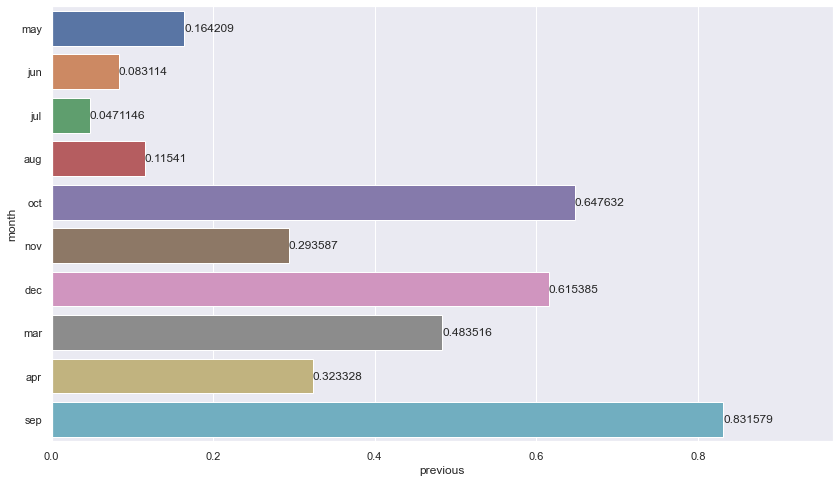

In [301]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='previous', y='month', data=data,
                 errwidth=0)
ax.bar_label(ax.containers[0]) 

# call place before the campaign over the months, by average

[Text(0, 0, '2.43976'),
 Text(0, 0, '3.07221'),
 Text(0, 0, '3.161'),
 Text(0, 0, '2.66656'),
 Text(0, 0, '1.54596'),
 Text(0, 0, '1.90929'),
 Text(0, 0, '2.15934'),
 Text(0, 0, '2.2033'),
 Text(0, 0, '1.94719'),
 Text(0, 0, '1.77368')]

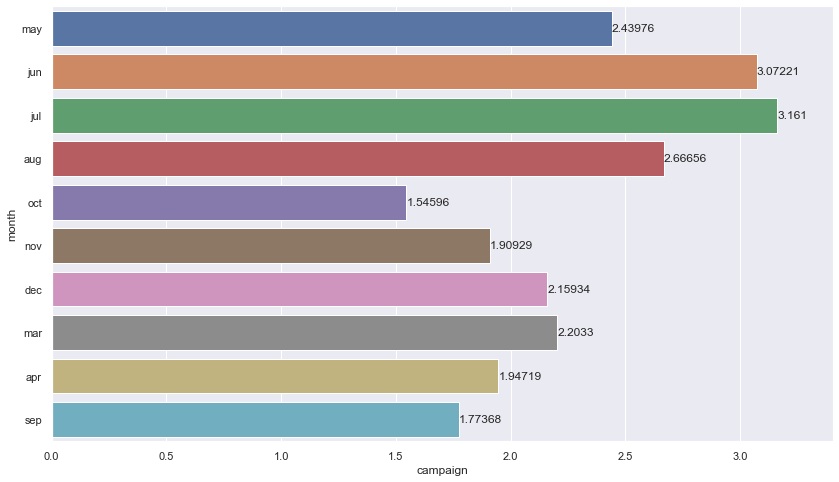

In [302]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='campaign', y='month', data=data,
                 errwidth=0)
ax.bar_label(ax.containers[0]) 
# Calls placed during the campaign over the month          
# estimator = sum, if I what to know the total 
# I use Excel for a more in depth comparison of the months


[Text(0, 0, '33593'),
 Text(0, 0, '16338'),
 Text(0, 0, '22677'),
 Text(0, 0, '16474'),
 Text(0, 0, '1110'),
 Text(0, 0, '7830'),
 Text(0, 0, '393'),
 Text(0, 0, '1203'),
 Text(0, 0, '5125'),
 Text(0, 0, '1011')]

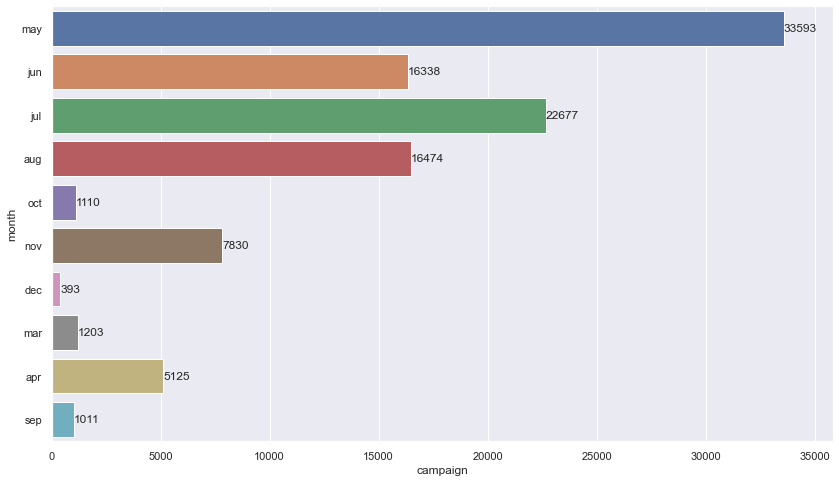

In [303]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='campaign', y='month', data=data,
                 errwidth=0,estimator = sum )
ax.bar_label(ax.containers[0]) 

# Calls placed during the campaign over the month           
# I use Excel for a more in depth comparison of the months


# Time

- Have done all my time/ line graphs in excel
- number of employees
- consumer conf.
- consumer price index

# Overview

In [9]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'year', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [305]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   year            41188 non-null  int64  
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

# Demographic Background

- Counting the yBinary in the group, to see if it had any affect on the outcome of the marketing campaign

<AxesSubplot:xlabel='age', ylabel='Count'>

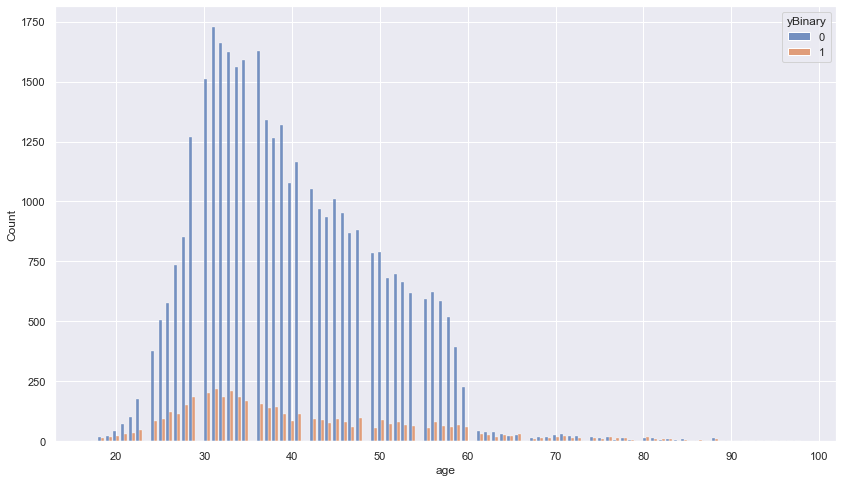

In [311]:
sns.histplot(data=df, x="age", hue="yBinary",multiple="dodge", shrink=.8)

Text(0, 0.5, 'Count')

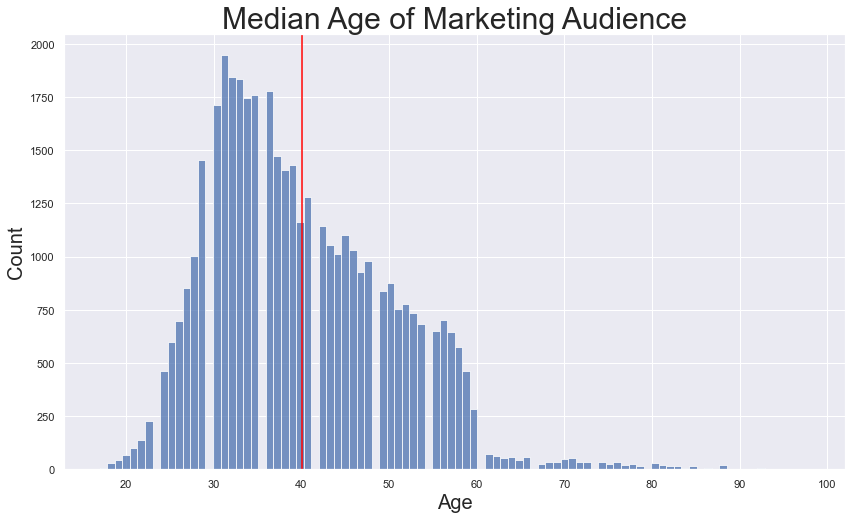

In [312]:
x = df['age'].values        # Checking the median age
mean = df['age'].mean()
sns.histplot(x = x)
ax = plt.axvline(mean,0, 1, color = 'red')

plt.title("Median Age of Marketing Audience", fontsize=30)        
plt.xlabel("Age",fontsize=20)
plt.ylabel("Count", fontsize=20)

Text(0, 0.5, 'Count')

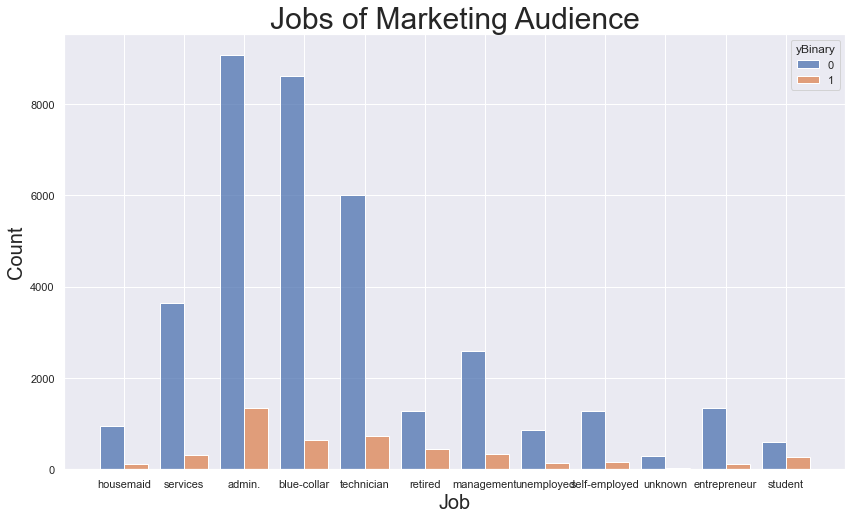

In [313]:
sns.histplot(data=df, x="job", hue="yBinary",multiple="dodge", shrink=.8)

plt.title("Jobs of Marketing Audience", fontsize=30)        
plt.xlabel("Job",fontsize=20)
plt.ylabel("Count", fontsize=20)

<AxesSubplot:xlabel='job', ylabel='Count'>

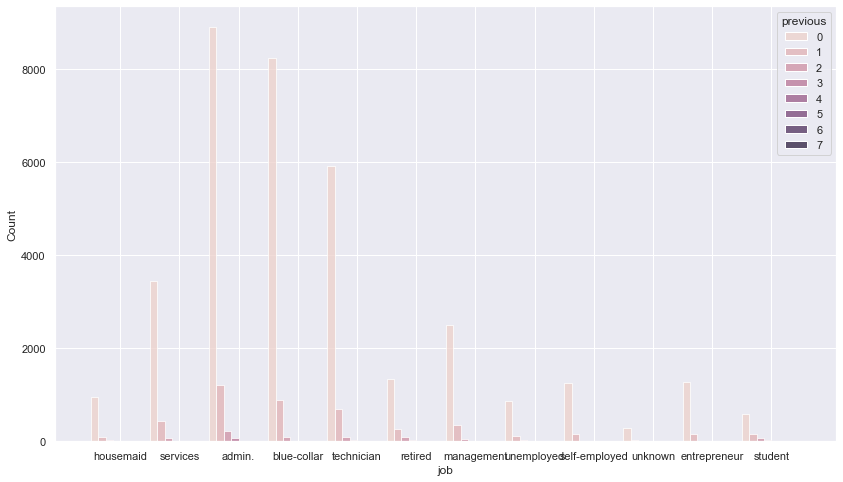

In [314]:
sns.histplot(data=df, x="job", hue="previous",multiple="dodge")
#previous: number of contacts performed before this campaign and for this client (numeric)


Text(0, 0.5, 'Count')

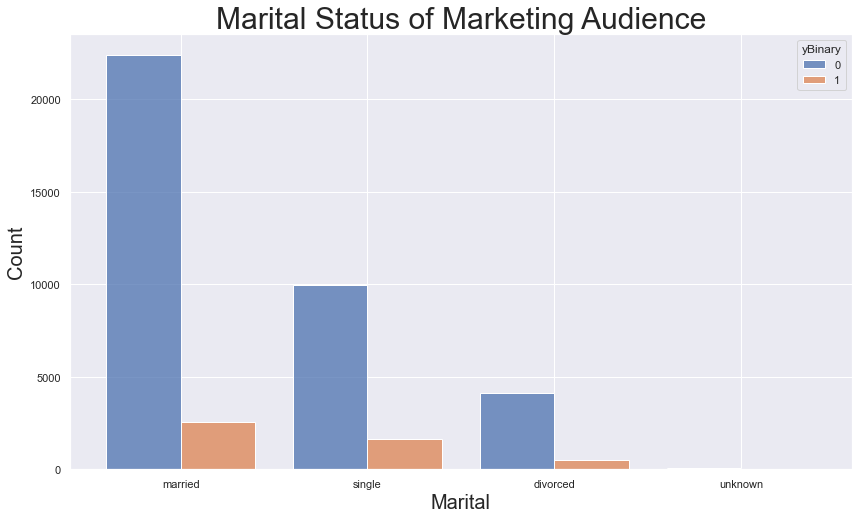

In [315]:
sns.histplot(data=df, x="marital", hue="yBinary",multiple="dodge", shrink=.8)

plt.title("Marital Status of Marketing Audience", fontsize=30)        
plt.xlabel("Marital",fontsize=20)
plt.ylabel("Count", fontsize=20)

Text(0, 0.5, 'Count')

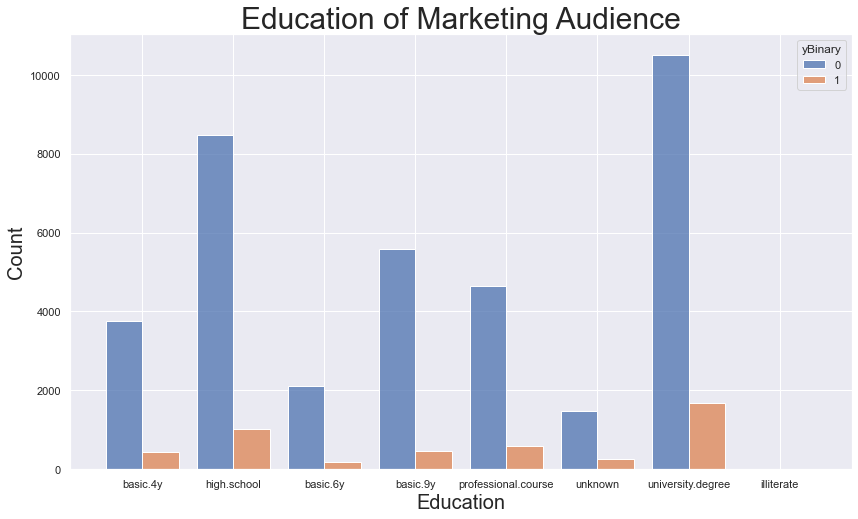

In [316]:
sns.histplot(data=df, x="education", hue="yBinary",multiple="dodge", shrink=.8)

plt.title("Education of Marketing Audience", fontsize=30)        
plt.xlabel("Education",fontsize=20)
plt.ylabel("Count", fontsize=20)

# Marketing


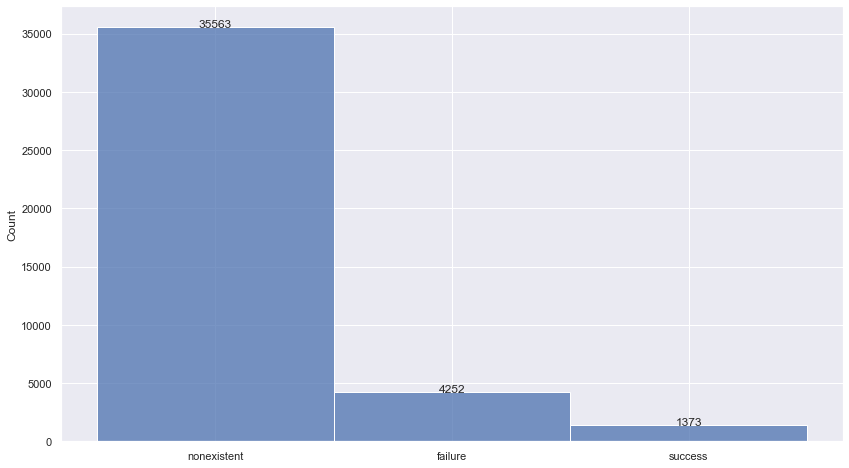

In [317]:
# Outcome of the previous marketing campaign

x = df['poutcome'].values
ax = sns.histplot(x = x)
sns.set(rc = {'figure.figsize':(20,10)})

for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.2,
 s = '{:.0f}'.format(height),
 ha = 'center') 


<AxesSubplot:xlabel='month', ylabel='Count'>

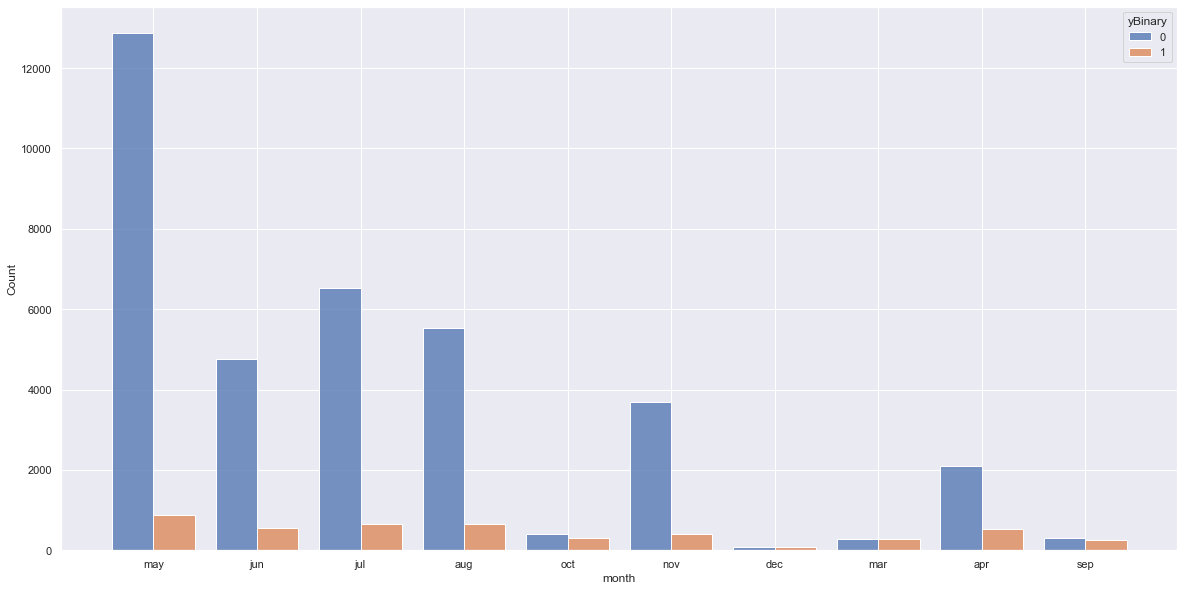

In [318]:
sns.histplot(data=df, x="month", hue="yBinary",multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

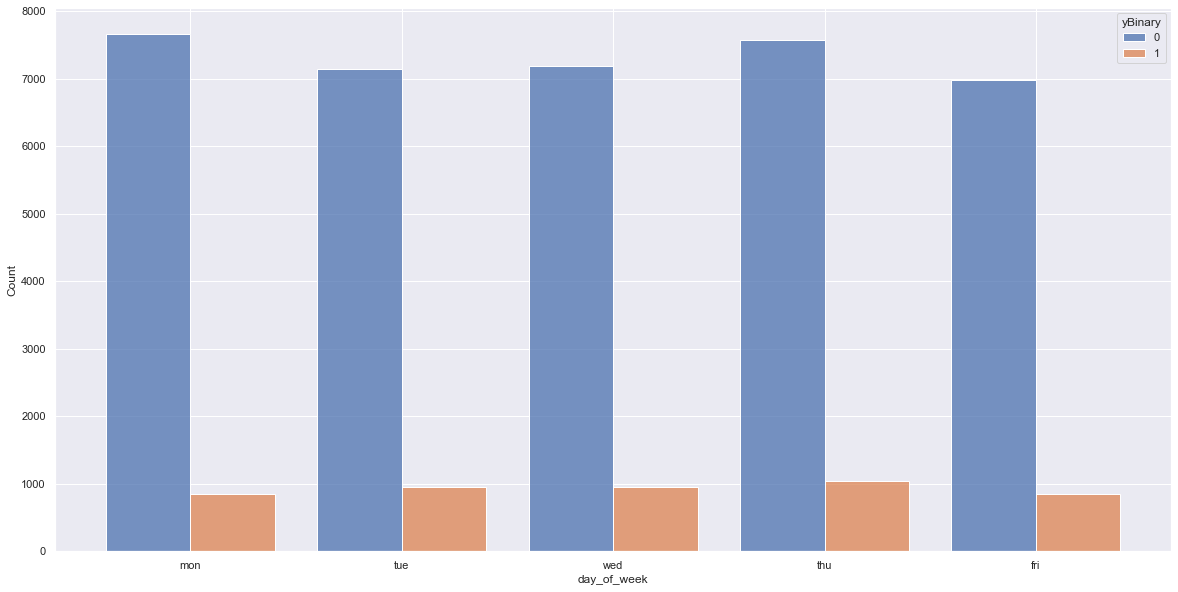

In [319]:
sns.histplot(data=df, x="day_of_week", hue="yBinary",multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='duration', ylabel='Count'>

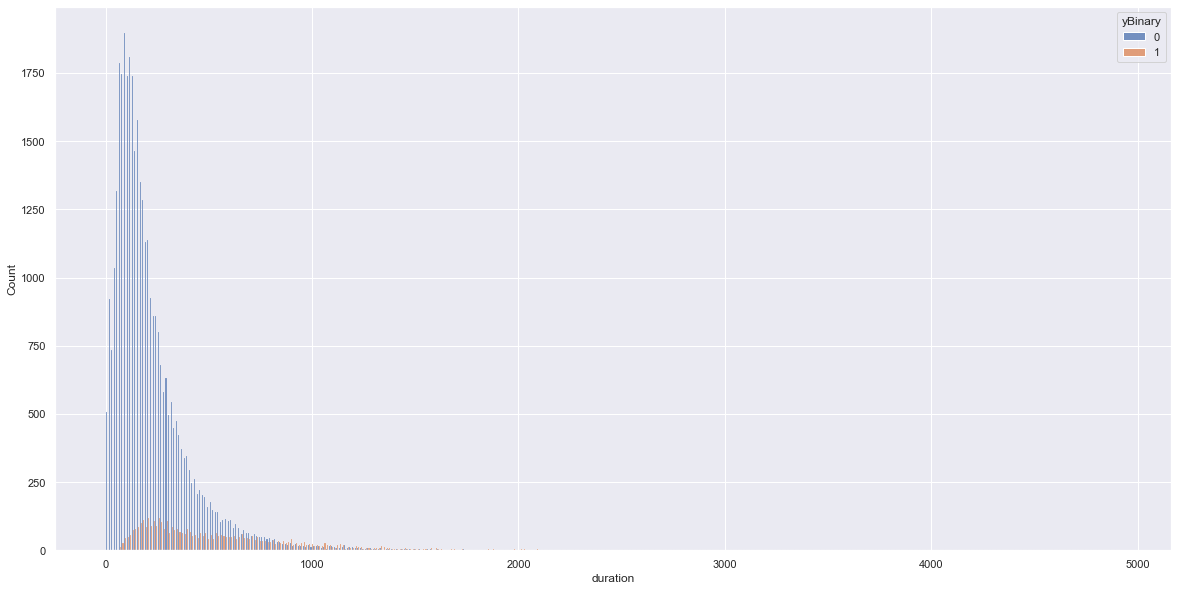

In [320]:
sns.histplot(data=df, x="duration", hue="yBinary",multiple="dodge", shrink=.8)
# find another plot to represent this, dont think its a good representation

# Charts for Presentation


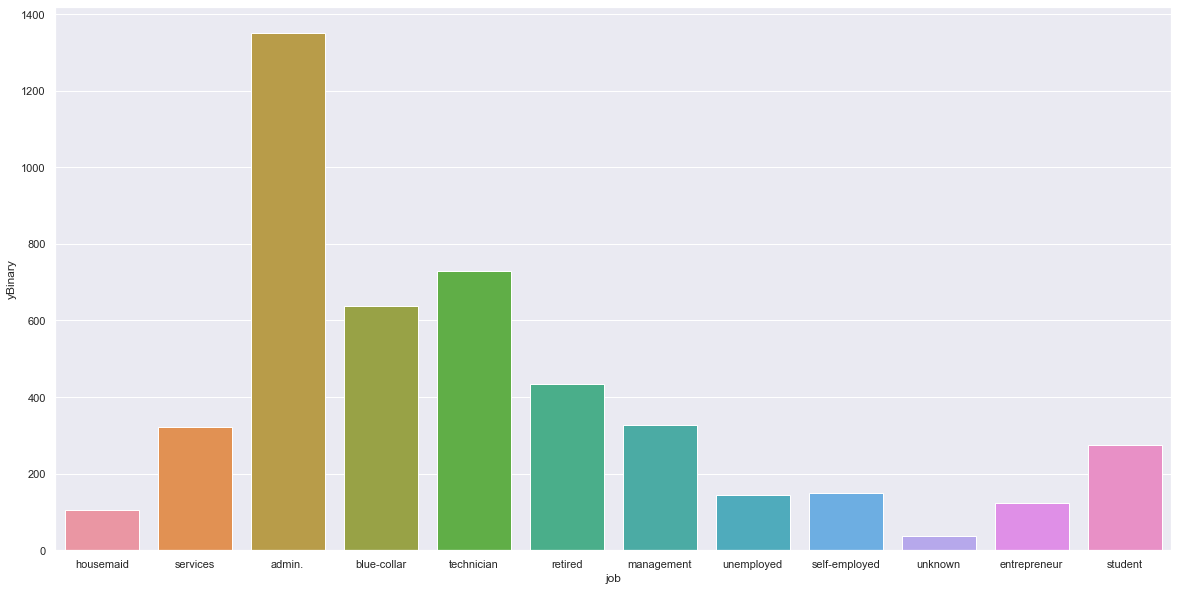

In [321]:
df['yBinary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
ax =sns.barplot(x = 'job' , y = 'yBinary', data = df, ci = False, estimator = sum )

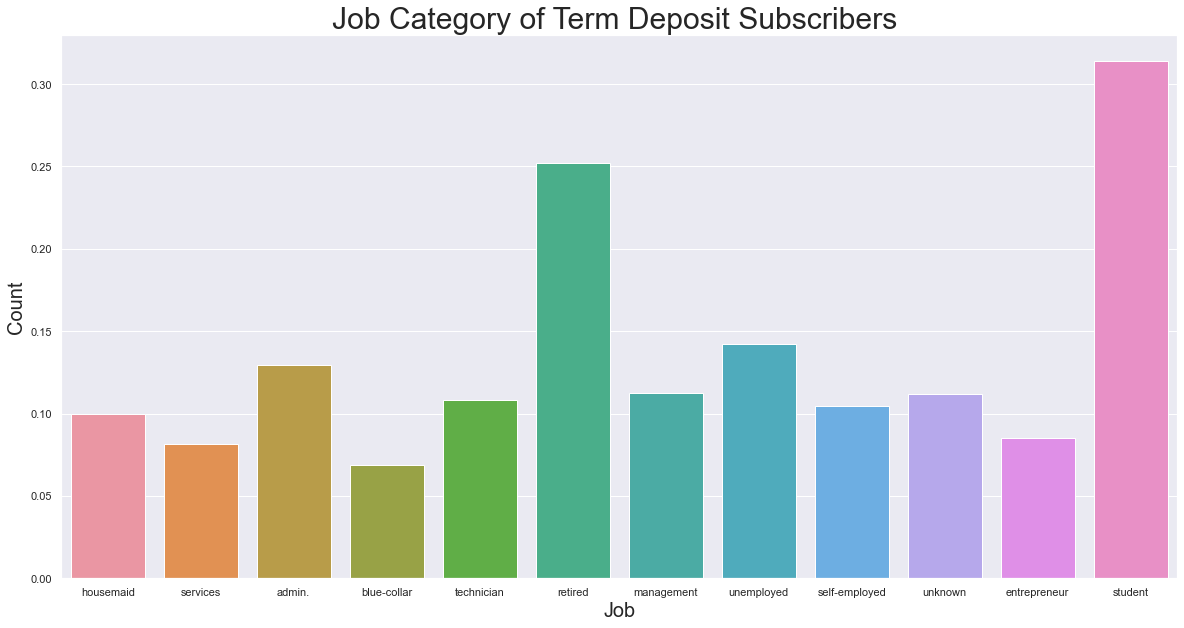

In [322]:
ax =sns.barplot(x = 'job' , y = 'yBinary', data = df, ci = False)
 # Who is most likely to say 'yes'?
plt.title("Job Category of Term Deposit Subscribers ", fontsize=30)        
plt.xlabel("Job",fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.show()  

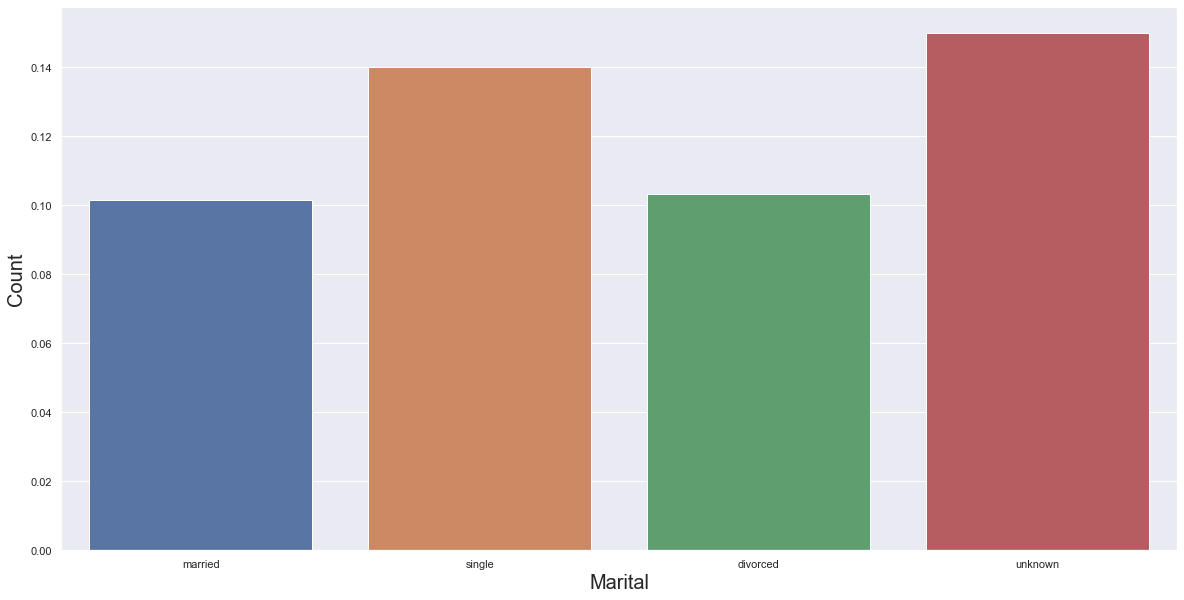

In [323]:
ax =sns.barplot(x = 'marital' , y = 'yBinary', data = df, ci = False)

# Who is most likely to say 'yes'?
#plt.title("Marital Category of Term Deposit Subscribers", fontsize=30)        
plt.xlabel("Marital",fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.show()

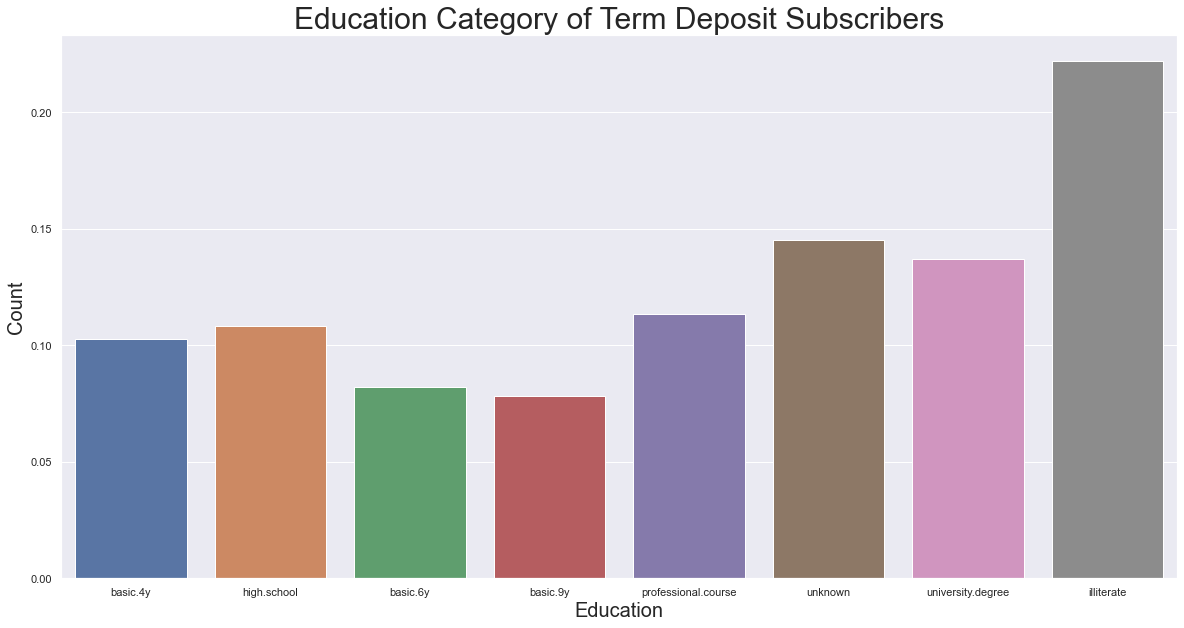

In [324]:
ax =sns.barplot(x = 'education' , y = 'yBinary', data = df, ci = False)

# Who is most likely to say 'yes'?
plt.title("Education Category of Term Deposit Subscribers", fontsize=30)        
plt.xlabel("Education",fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.show()

Text(0, 0.5, 'Count')

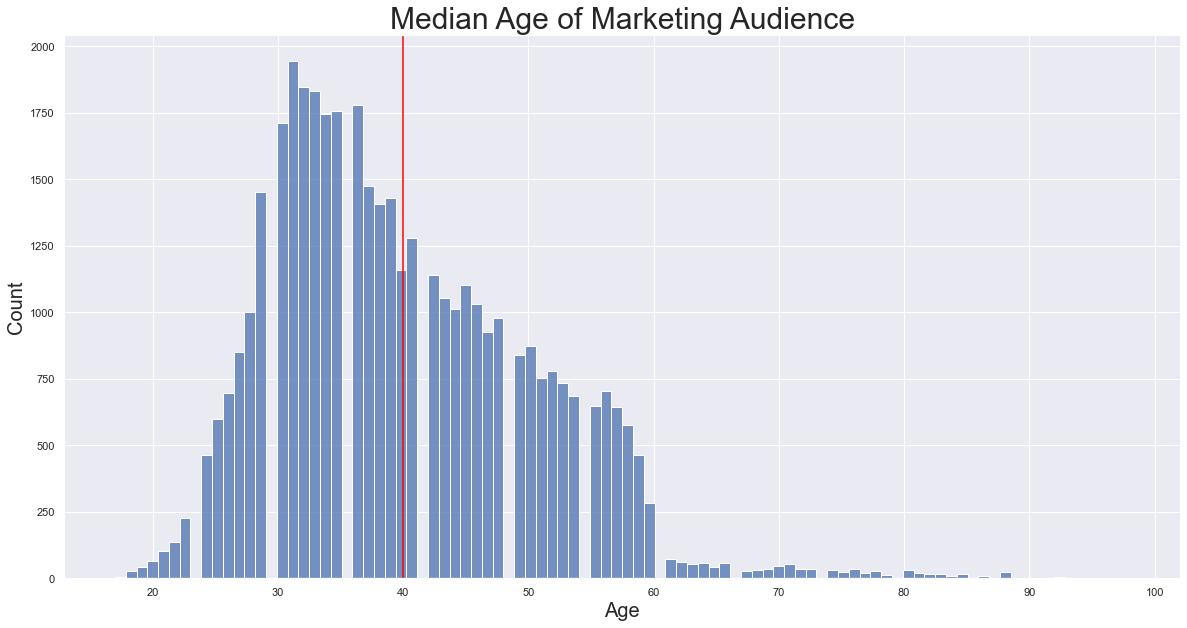

In [325]:
x = df['age'].values        # Checking the median age
mean = df['age'].mean()
sns.histplot(x = x)
ax = plt.axvline(mean,0, 1, color = 'red')

plt.title("Median Age of Marketing Audience", fontsize=30)        
plt.xlabel("Age",fontsize=20)
plt.ylabel("Count", fontsize=20)

Text(0, 0.5, 'Outcome')

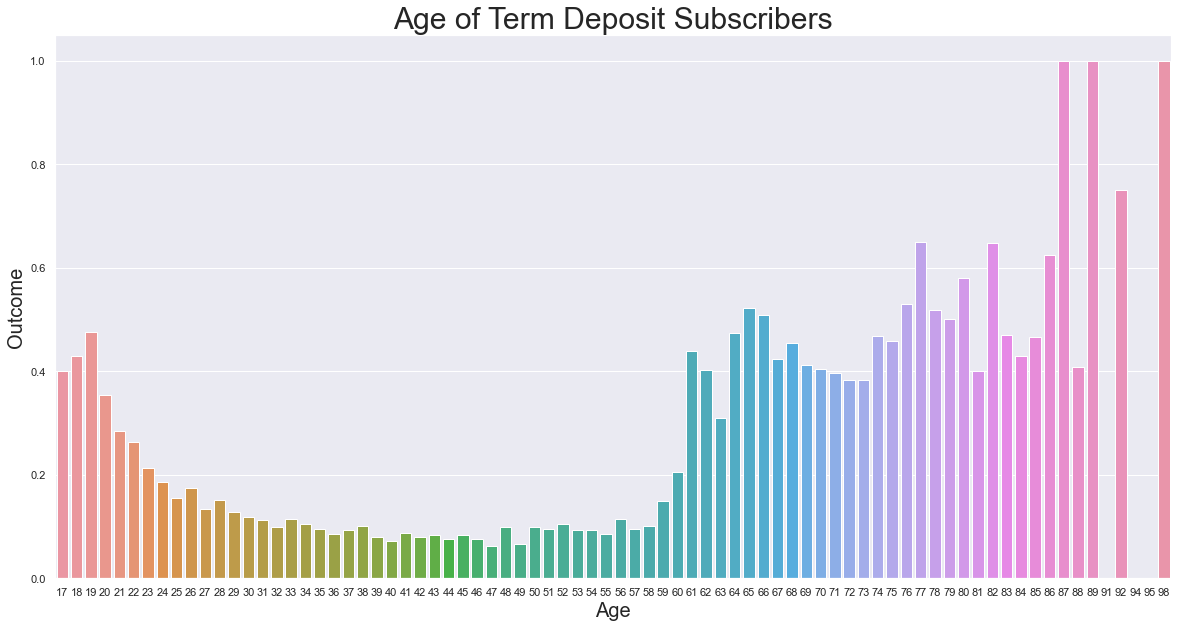

In [329]:
ax =sns.barplot(x = 'age' , y = 'yBinary', data = df, ci = False)

# Who is most likely to say 'yes'?
plt.title("Age of Term Deposit Subscribers", fontsize=30)        
plt.xlabel("Age",fontsize=20)
plt.ylabel("Outcome", fontsize=20)


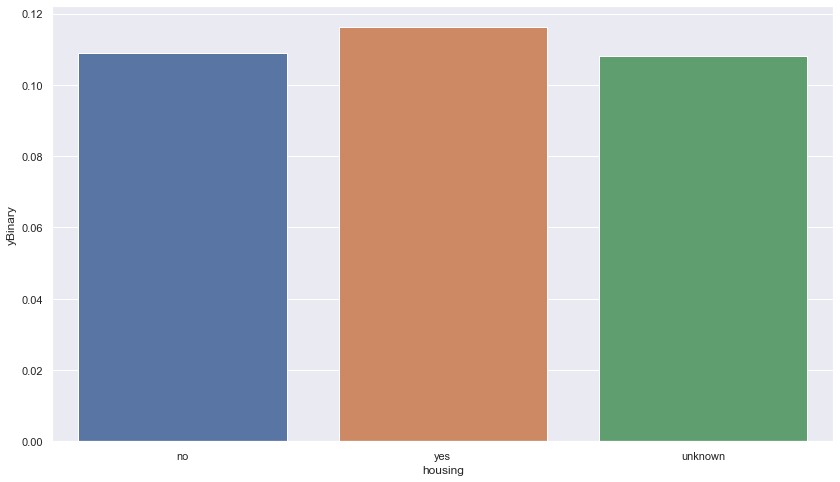

In [250]:
ax =sns.barplot(x = 'housing' , y = 'yBinary', data = df, ci = False)


<module 'matplotlib.pyplot' from '/Users/stephaniepierre/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

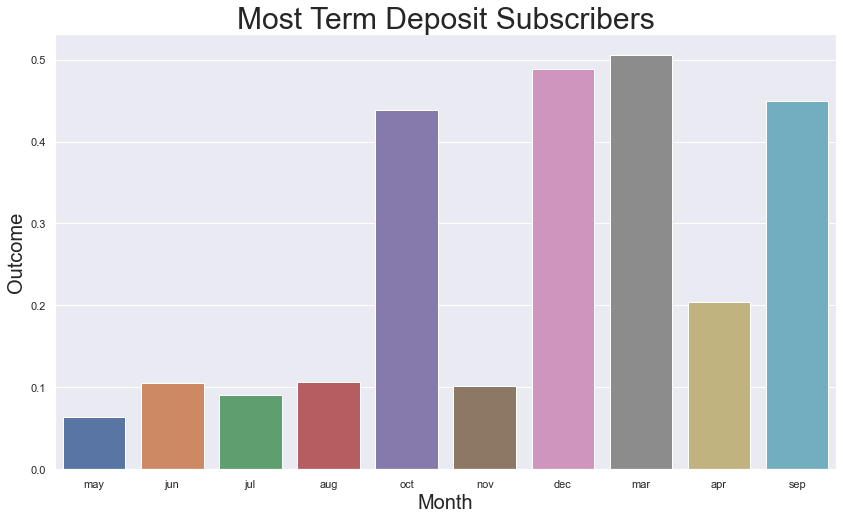

In [247]:
ax =sns.barplot(x = 'month' , y = 'yBinary', data = df, ci = False)

# not sure if I should use this plot. Why do these months have more yes?
plt.title("Most Term Deposit Subscribers", fontsize=30)        
plt.xlabel("Month",fontsize=20)
plt.ylabel("Outcome", fontsize=20)
plt

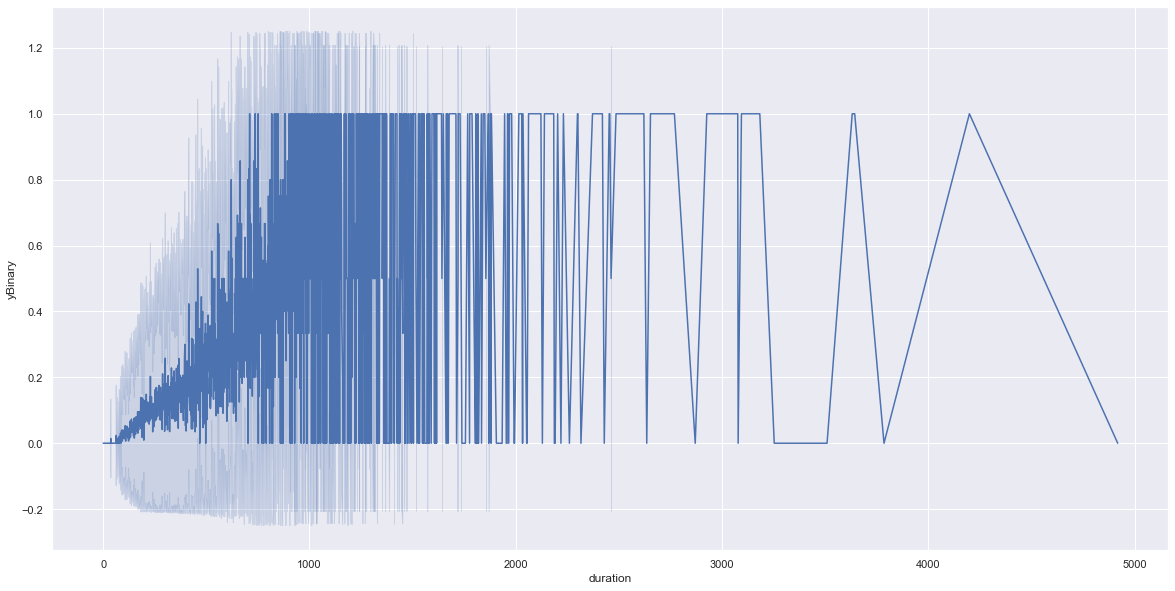

In [61]:
ax = sns.lineplot(x = 'duration', y = 'yBinary', data = df, ci = 'sd')

# Syntax: 

- seaborn.barplot(data, x=None, y=None, hue=None, data=None, order=None, orient=None, color=None, palette=None, saturation=0.75,errwidth)
# Parameters:

- data – specifies the dataframe to be used to bar plot
- x, y – specifies the data to be used along the x-axis and y- axis. (long form data)
- order – specifies the order in which the categorical values has to be plotted
- orient – ‘v’ specifies vertical orientation  and ‘h’ specifies horizontal orientation
- color –  specifies the color gradient of all elements
- palette – list of colors that has to be used for different levels
- errwidth – specifies the error bar width

[Text(0, 0, '93.8427'), Text(0, 0, '92.8417'), Text(0, 0, '94.0633')]

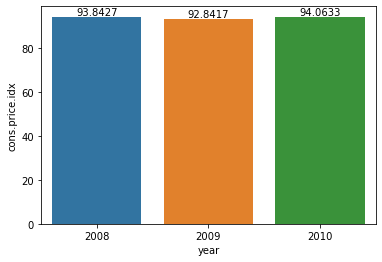

In [10]:
df = pd.read_csv("data/bank-additional-full.csv")
ax = sns.barplot(x='year', y='cons.price.idx', data = df,
                 errwidth=0)
ax.bar_label(ax.containers[0]) 

# Use excel line graph instead


In [67]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Heatmap
- Here I am using a heat map to gain a better understand of the relationship between different features in this data set.

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [113]:
pivot = df.pivot_table(index = 'marital', columns = 'job', values = 'yBinary', aggfunc = 'mean')

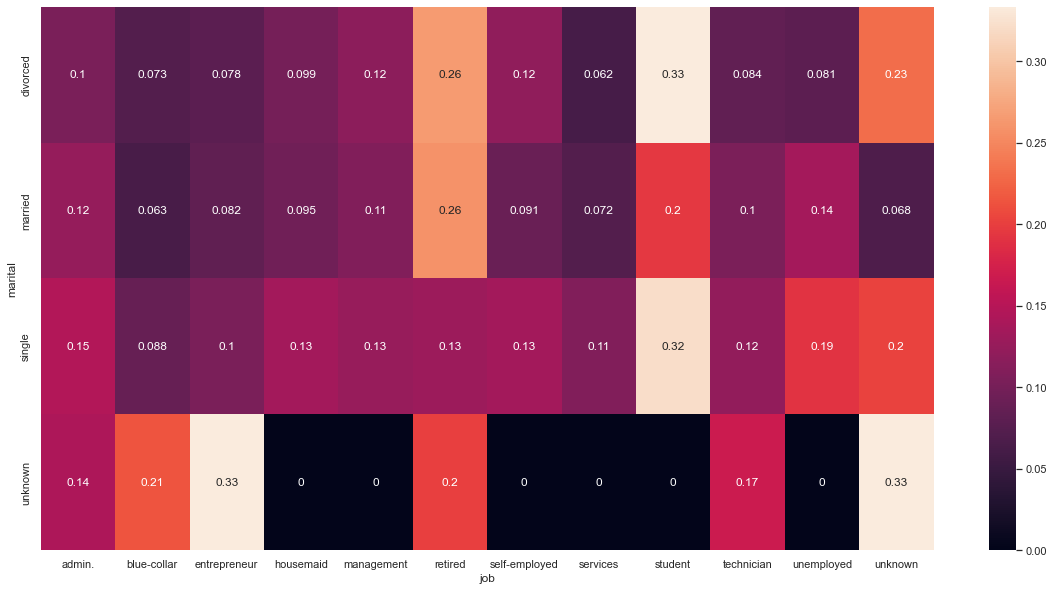

In [114]:
hm = sns.heatmap(pivot, annot = True)


In [116]:
pivot2 = df.pivot_table(index = 'marital', columns = 'education', values = 'yBinary', aggfunc = 'mean')

Text(102.5, 0.5, 'Marital')

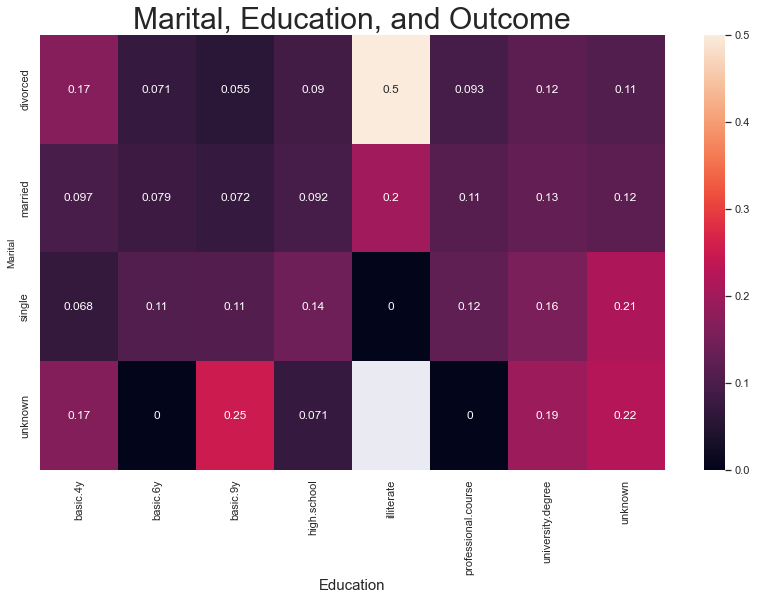

In [245]:
hm = sns.heatmap(pivot2, annot = True)

plt.title("Marital, Education, and Outcome", fontsize=30)        
plt.xlabel("Education",fontsize=15)
plt.ylabel("Marital", fontsize=10)

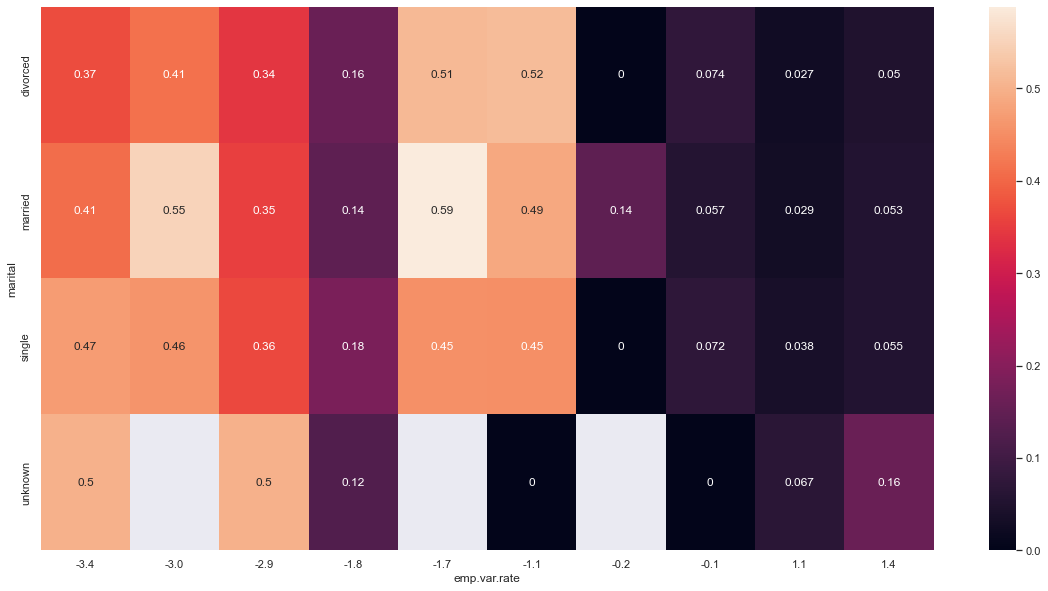

In [118]:
pivot4 = df.pivot_table(index = 'marital', columns = 'emp.var.rate', values = 'yBinary', aggfunc = 'mean')
hm = sns.heatmap(pivot4, annot = True)



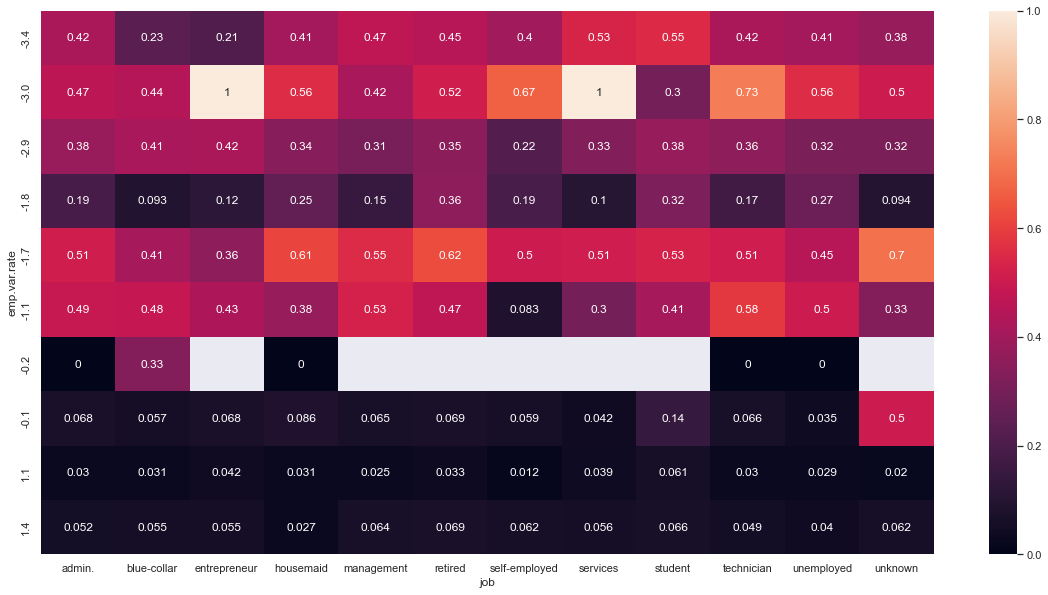

In [121]:
pivot5 = df.pivot_table(index = 'emp.var.rate', columns = 'job', values = 'yBinary', aggfunc = 'mean')
hm = sns.heatmap(pivot5, annot = True)

<AxesSubplot:>

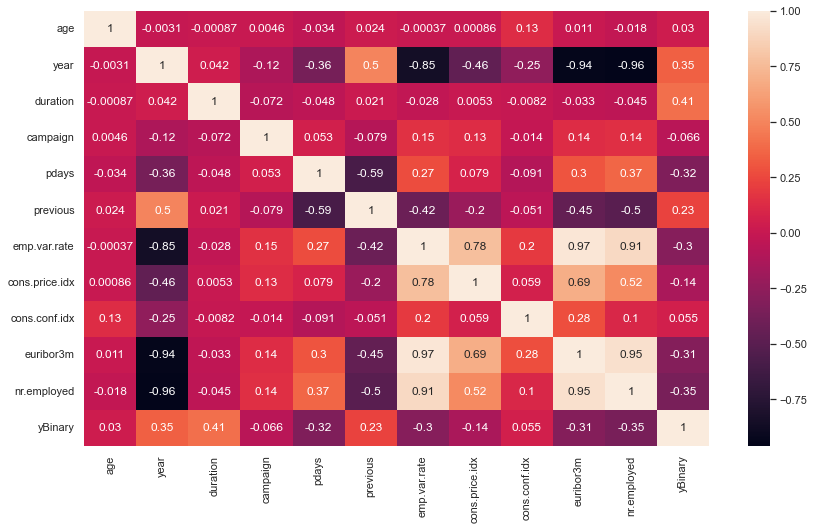

In [206]:
sns.heatmap(df.corr(), annot = True)


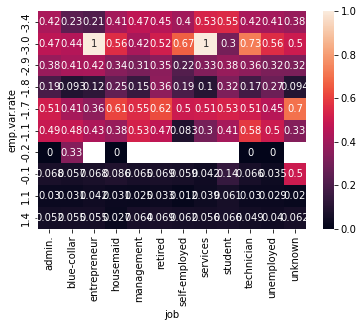

In [36]:
pivot6 = df.pivot_table(index = 'emp.var.rate', columns = 'job', values = 'yBinary', aggfunc = 'mean')
hm = sns.heatmap(pivot6, annot = True)

# Consumer Confidence Index (CCI)
- The Consumer Confidence Index (CCI) is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation.(monthly indicator)
- In Portugal, the consumer confidence index on three terms moving averages is based on interviews with consumers about their perceptions of the country's current and future economic situation and their tendencies to purchase. It is estimated using the difference between the share of positive evaluation responses and negative evaluation responses, but do not include the share of neutral responses. The use of moving averages smooths out the series by removing the irregular movements, allowing the detection of the short-term trends.
- Declining consumer confidence is a sign of slowing economic growth and may indicate that the economy is headed into trouble.

https://tradingeconomics.com/portugal/consumer-confidence

https://www.masterclass.com/articles/consumer-confidence-index#limitations-of-the-consumer-confidence-index

https://data.oecd.org/leadind/consumer-confidence-index-cci.htm#indicator-chart


In [ ]:
#sns.set(rc={'figure.figsize': (20, 10)}) 


In [ ]:
#sns.histplot(data=df, x="cons.conf.idx", hue="yBinary",multiple="dodge", shrink=.8)
# try stackbar

In [ ]:
#x = df['emp.var.rate'].values
#ax = sns.histplot(x = x)

#for p in ax.patches:
 #height = p.get_height() 
 #ax.text(x = p.get_x()+(p.get_width()/2), 
 #y = height+0.2,
 #s = '{:.0f}'.format(height), 
 #ha = 'center') 

In [ ]:
#sns.histplot(data=df, x="emp.var.rate", hue="yBinary",multiple="dodge", shrink=.8)

# Consumer Price Index
- The Consumer Price Index (CPI) is an indicator showing how the prices of a certain basket of goods and services bought by a “typical” consumer change over time. The CPI has been designed to capture price changes and not to measure price levels. (monthly indicator)

https://courses.lumenlearning.com/wm-macroeconomics/chapter/changes-in-the-cost-of-living/#:~:text=One%20example%20might%20be%20the,buy%20and%20where%20they%20shop.

https://www.economy.com/portugal/consumer-price-index-cpi

# Ordinary Least Squares (OLS) regression

- One of the reseason I am using the OLS resgression is for the R-square value.Which will help me determines the proportion of variance in the dependent variable that can be explained by the independent variable.

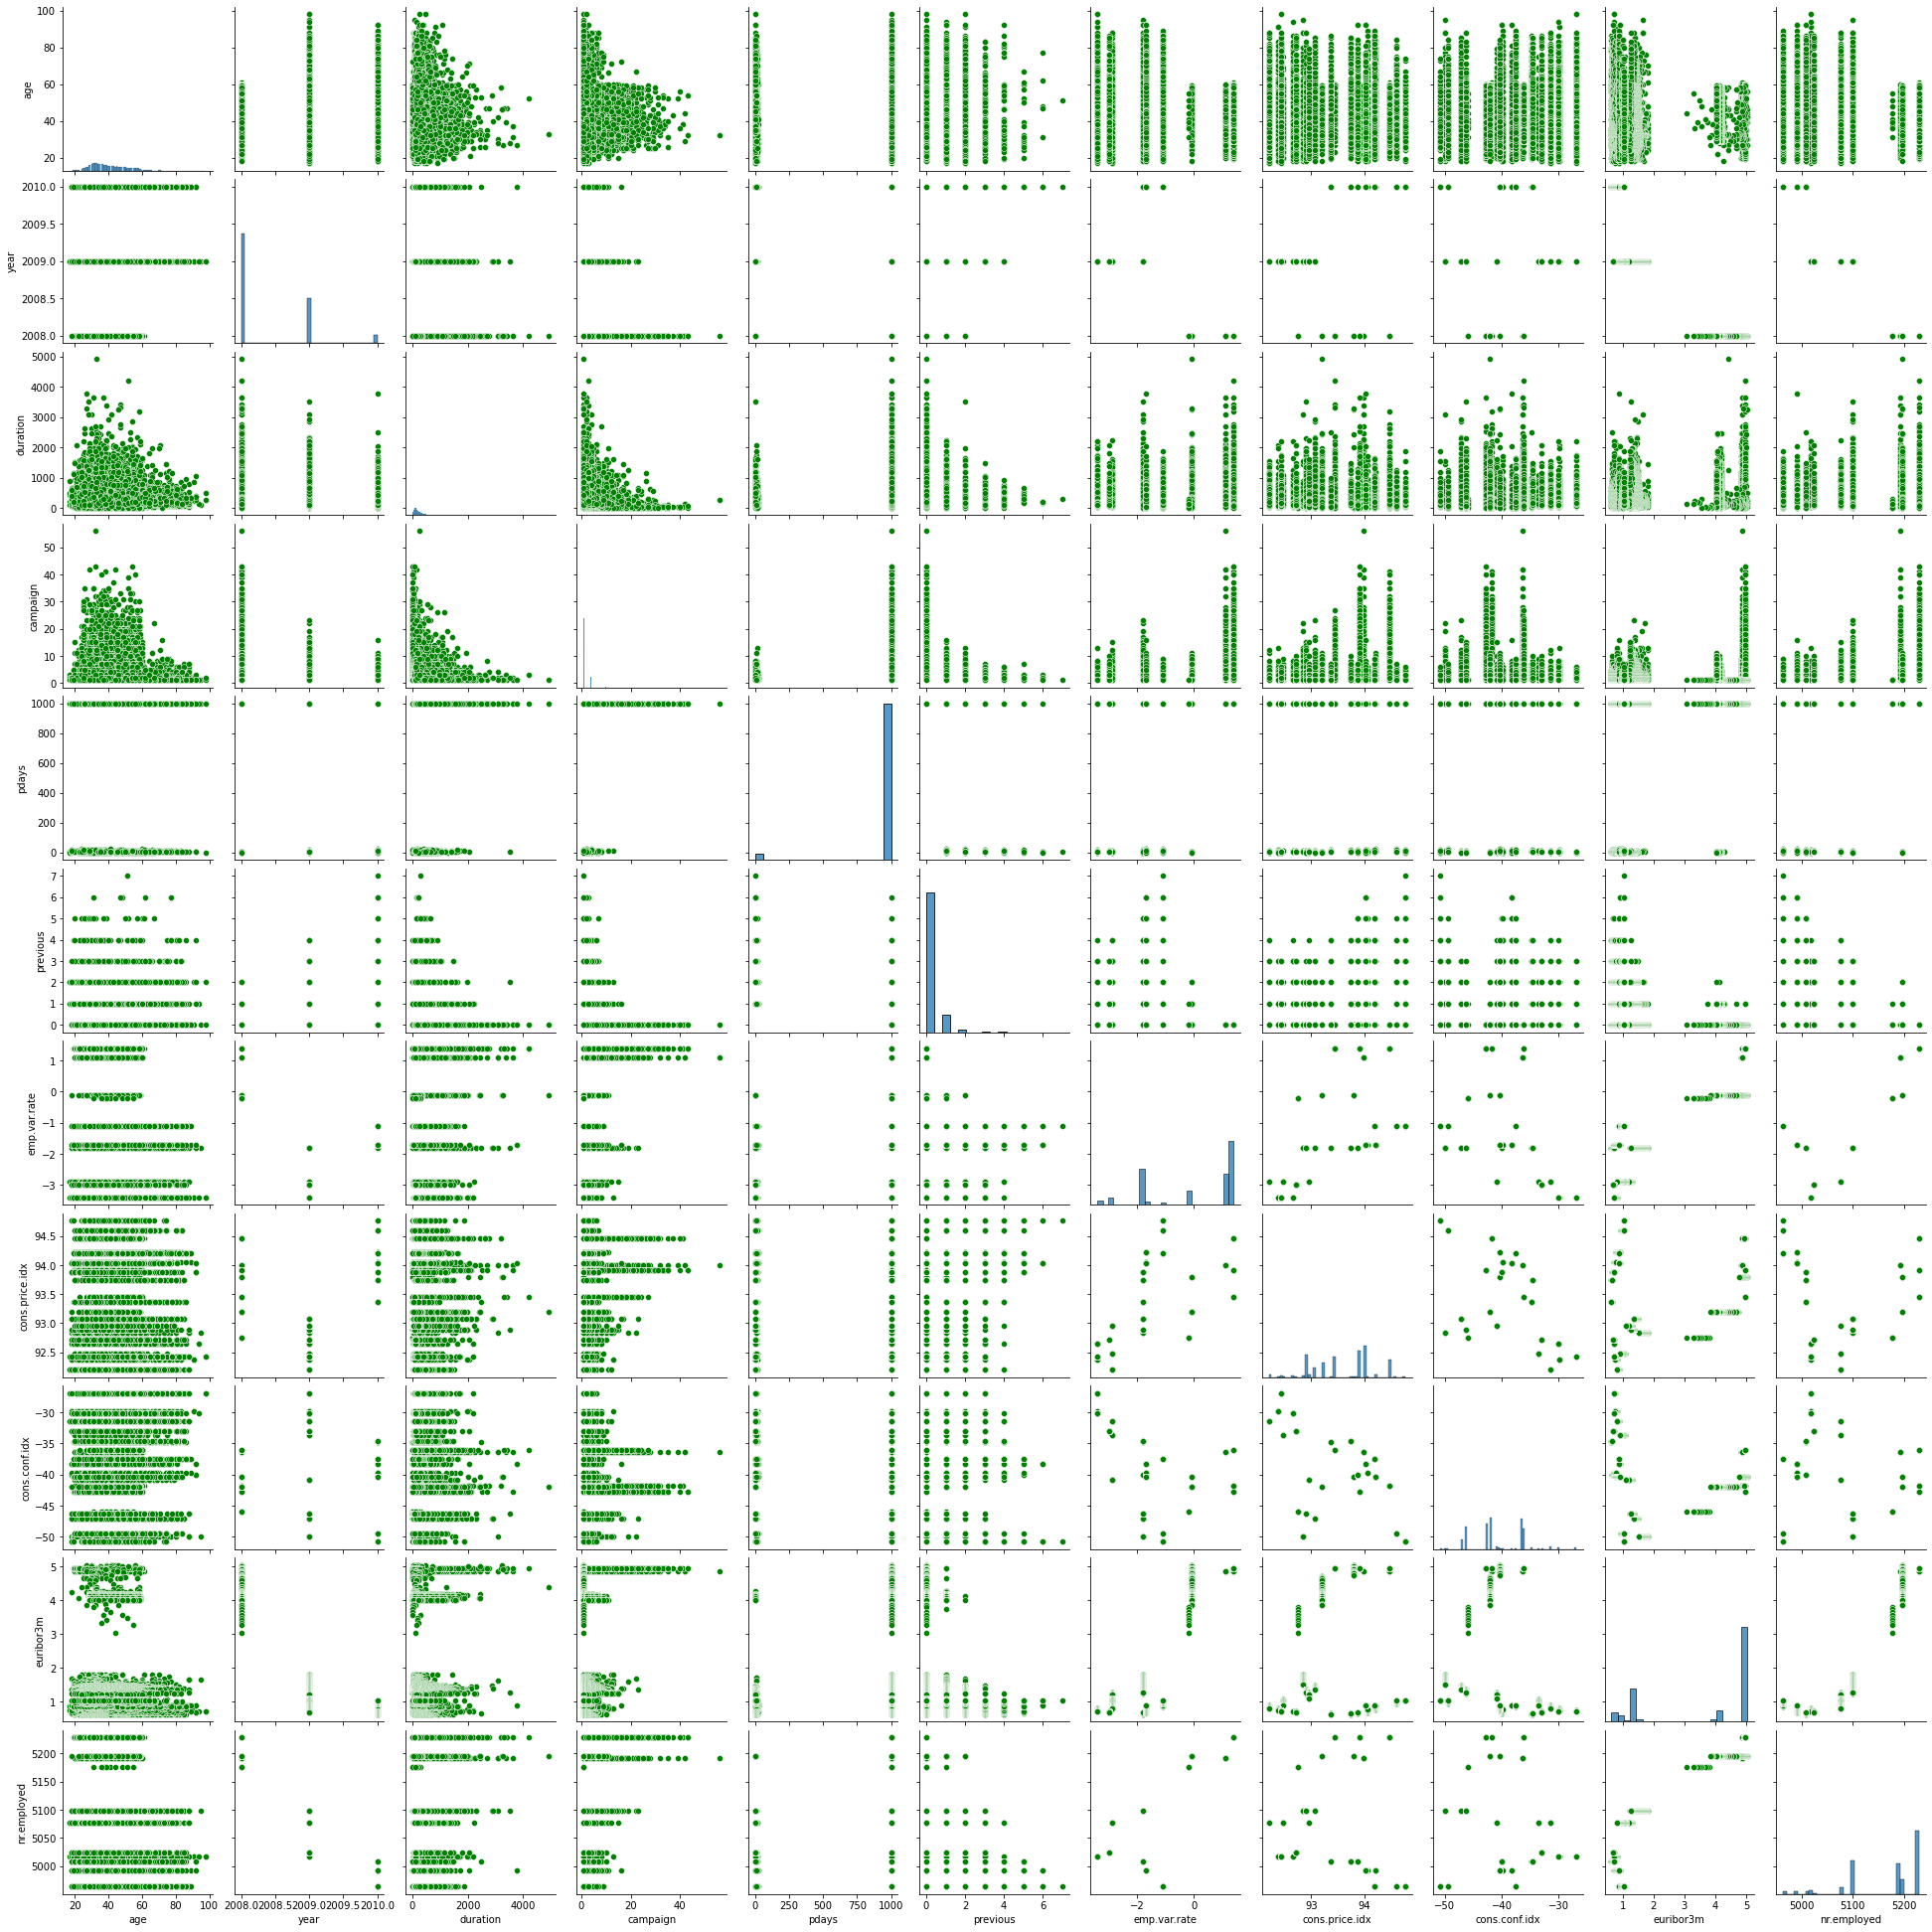

In [23]:
sns.pairplot(df, plot_kws = {"color": "green"})

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'year', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [25]:
#  LR

# defining the variables
x = df['nr.employed'].tolist()
y = df['emp.var.rate'].tolist()
# adding the constant term
x = sm.add_constant(x)
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.910e+05
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:33:18   Log-Likelihood:                -41433.
No. Observations:               41188   AIC:                         8.287e+04
Df Residuals:                   41186   BIC:                         8.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.8130      0.233   -436.609      0.0

In [47]:
# defining the variables
x = df['cons.conf.idx'].tolist()
y = df['emp.var.rate'].tolist()
# adding the constant term
x = sm.add_constant(x)
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1646.
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:01:16   Log-Likelihood:                -76240.
No. Observations:               41188   AIC:                         1.525e+05
Df Residuals:                   41186   BIC:                         1.525e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7770      0.067     41.535      0.0

In [46]:
# defining the variables
x = df['cons.conf.idx'].tolist()
y = df['cons.price.idx'].tolist()
# adding the constant term
x = sm.add_constant(x)
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           4.46e-33
Time:                        23:01:09   Log-Likelihood:                -35852.
No. Observations:               41188   AIC:                         7.171e+04
Df Residuals:                   41186   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.8745      0.025   3743.110      0.0

In [45]:
# defining the variables
x = df['age'].tolist()
y = df['duration'].tolist()
# adding the constant term
x = sm.add_constant(x)
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03087
Date:                Sat, 27 Aug 2022   Prob (F-statistic):              0.861
Time:                        23:01:01   Log-Likelihood:            -2.8736e+05
No. Observations:               41188   AIC:                         5.747e+05
Df Residuals:                   41186   BIC:                         5.747e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.1471      5.070     51.110      0.0

In [29]:
# defining the variables
x = df['campaign'].tolist()
y = df['age'].tolist()
# adding the constant term
x = sm.add_constant(x)
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8691
Date:                Sat, 27 Aug 2022   Prob (F-statistic):              0.351
Time:                        22:33:52   Log-Likelihood:            -1.5498e+05
No. Observations:               41188   AIC:                         3.100e+05
Df Residuals:                   41186   BIC:                         3.100e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9797      0.070    571.005      0.0

In [31]:
# defining the variables
x = df['cons.conf.idx'].tolist()
y = df['cons.price.idx'].tolist()
# adding the constant term
x = sm.add_constant(x)
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           4.46e-33
Time:                        22:34:10   Log-Likelihood:                -35852.
No. Observations:               41188   AIC:                         7.171e+04
Df Residuals:                   41186   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.8745      0.025   3743.110      0.0

# Machine Learning

- I reduce data in excel to relevant columns to start off. If additional columns are needed  I will add it back in.

In [58]:
#read the dataframe from file,
df_machine = pd.read_csv('data/bank-additional-full2.csv')

In [59]:
df_machine['yBinary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact  year month  ... pdays  previous  

In [60]:
df_machine.columns # Checking to make sure file was reduced

Index(['age', 'job', 'marital', 'education', 'month', 'duration', 'yBinary'], dtype='object')

## Label Encoding¶
 - I am converting the lablels into numeric form so as to convert them inte machine-readable form.
 - Chang all my objects into intr64

In [61]:
df_machine.dtypes

age           int64
job          object
marital      object
education    object
month        object
duration      int64
yBinary       int64
dtype: object

In [62]:
df_machine.iloc[:,1].values #job

array(['housemaid', 'services', 'services', ..., 'retired', 'technician',
       'retired'], dtype=object)

### Job

In [63]:
# Encode the job values
from sklearn.preprocessing import LabelEncoder
labelencoderjob = LabelEncoder()
labelencoderjob.fit_transform(df.iloc[:,1].values)

array([3, 7, 7, ..., 5, 9, 5])

In [64]:
df_machine.iloc[:,1]=labelencoderjob.fit_transform(df.iloc[:,1].values)

In [69]:
df_machine

,age,job,marital,education,month,duration,yBinary
0,56,3,married,basic.4y,may,261,0
1,57,7,married,high.school,may,149,0
2,37,7,married,high.school,may,226,0
3,40,0,married,basic.6y,may,151,0
4,56,7,married,high.school,may,307,0
...,...,...,...,...,...,...,...
41183,73,5,married,professional.course,nov,334,1
41184,46,1,married,professional.course,nov,383,0
41185,56,5,married,university.degree,nov,189,0
41186,44,9,married,professional.course,nov,442,1


### Marital

In [70]:
df_machine.iloc[:,2].values

array(['married', 'married', 'married', ..., 'married', 'married',
       'married'], dtype=object)

In [71]:
# Encode the marital value
from sklearn.preprocessing import LabelEncoder
labelencodermarital = LabelEncoder()
labelencodermarital.fit_transform(df.iloc[:,2].values)

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
df_machine.iloc[:,2]=labelencodermarital.fit_transform(df.iloc[:,2].values)

In [73]:
df_machine

,age,job,marital,education,month,duration,yBinary
0,56,3,1,basic.4y,may,261,0
1,57,7,1,high.school,may,149,0
2,37,7,1,high.school,may,226,0
3,40,0,1,basic.6y,may,151,0
4,56,7,1,high.school,may,307,0
...,...,...,...,...,...,...,...
41183,73,5,1,professional.course,nov,334,1
41184,46,1,1,professional.course,nov,383,0
41185,56,5,1,university.degree,nov,189,0
41186,44,9,1,professional.course,nov,442,1


### Education

In [74]:
df_machine.iloc[:,3].values # education

array(['basic.4y', 'high.school', 'high.school', ..., 'university.degree',
       'professional.course', 'professional.course'], dtype=object)

In [75]:
# Encode the Education value
from sklearn.preprocessing import LabelEncoder
labelencodereducation = LabelEncoder()
labelencodereducation.fit_transform(df.iloc[:,3].values)

array([0, 3, 3, ..., 6, 5, 5])

In [76]:
df_machine.iloc[:,3]=labelencodereducation.fit_transform(df.iloc[:,3].values)

In [77]:
df_machine

,age,job,marital,education,month,duration,yBinary
0,56,3,1,0,may,261,0
1,57,7,1,3,may,149,0
2,37,7,1,3,may,226,0
3,40,0,1,1,may,151,0
4,56,7,1,3,may,307,0
...,...,...,...,...,...,...,...
41183,73,5,1,5,nov,334,1
41184,46,1,1,5,nov,383,0
41185,56,5,1,6,nov,189,0
41186,44,9,1,5,nov,442,1


### Month

In [78]:
df_machine.iloc[:,4].values # month

array(['may', 'may', 'may', ..., 'nov', 'nov', 'nov'], dtype=object)

In [79]:
# Encode the month value
from sklearn.preprocessing import LabelEncoder
labelencodermonth = LabelEncoder()
labelencodermonth.fit_transform(df.iloc[:,4].values)

array([0, 1, 0, ..., 0, 0, 0])

In [80]:
df_machine.iloc[:,4]=labelencodermonth.fit_transform(df.iloc[:,4].values)

In [81]:
df_machine

,age,job,marital,education,month,duration,yBinary
0,56,3,1,0,0,261,0
1,57,7,1,3,1,149,0
2,37,7,1,3,0,226,0
3,40,0,1,1,0,151,0
4,56,7,1,3,0,307,0
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,334,1
41184,46,1,1,5,0,383,0
41185,56,5,1,6,0,189,0
41186,44,9,1,5,0,442,1


In [82]:
df_machine.dtypes # Checking label encoding

age          int64
job          int64
marital      int64
education    int64
month        int64
duration     int64
yBinary      int64
dtype: object

## Machine Learning: Logistic Regression


In [83]:
lr=LogisticRegression(max_iter=500)

In [84]:
# I split it into 2 dataframes
train, test = train_test_split(df_machine, test_size=.25)

In [85]:
train.head()

,age,job,marital,education,month,duration,yBinary
8665,36,0,1,2,0,121,0
5060,39,9,0,5,0,363,0
30343,38,0,2,6,0,555,1
23076,50,1,1,5,0,14,0
35564,37,4,0,6,0,493,1


In [86]:
test.head()

,age,job,marital,education,month,duration,yBinary
4598,31,9,2,6,0,47,0
6147,39,1,1,0,1,395,0
40957,37,0,2,3,0,301,1
11434,39,1,1,3,0,368,0
20128,56,5,1,0,0,97,0


In [87]:
# the training features are the first 6 columns
train_feat = train.iloc[:, :6]
# the 'outcome' column is y/yBinary
train_targ = train["yBinary"]

In [88]:
lr.fit(train_feat, train_targ)     # train the regression machine

LogisticRegression(max_iter=500)

In [90]:
lr.score(train_feat, train_targ)

0.8938849503091515

### Testing the LR Machine

In [91]:
test_feat = test.iloc[:, :6]           # This my prediction code
test_targ = test["yBinary"]

In [92]:
lr.score(test_feat, test_targ)         # The score for my prediction

0.8914246868019812

In [ ]:
lr.predict(test_feat)  

# This is to exam mean prediction 

array([0, 0, 0, ..., 0, 0, 1])

[[8993  962]
 [ 156  186]]


<AxesSubplot:>

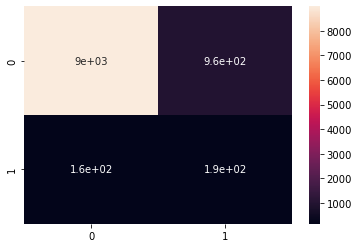

In [94]:
cm = confusion_matrix(lr.predict(test_feat),test_targ) #plot confusion matrix
print(cm)
sns.heatmap(cm, annot = True)

# confusion (Error) Matrix is simple summary of how our classisfer did in term of 
# making correct postive and correct negative, but also false positive and false negative
# these are the type of error we can make called type 1 and type 2 error

I reduce my dataframe seven columns that are the most essential to the learning feature.

- 8,993 is **correct positive predictions**

- 962 is **false positive predictions**

- 156 is **false negatve predictions**

- 186 is **correct negative predictions**

- fun fact add together 32,950

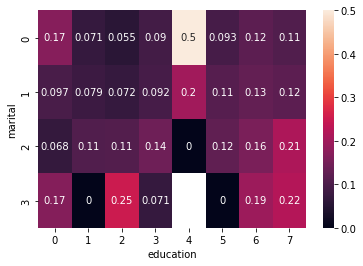

In [95]:
pivot = df_machine.pivot_table(index = 'marital', columns = 'education', values = 'yBinary', aggfunc = 'mean')
hm = sns.heatmap(pivot, annot = True)

## Machine Learning: Neural Network

In [96]:
df_machine.columns

Index(['age', 'job', 'marital', 'education', 'month', 'duration', 'yBinary'], dtype='object')

In [97]:
features_and_target= df_machine 

In [98]:
features_and_target.head()

,age,job,marital,education,month,duration,yBinary
0,56,3,1,0,0,261,0
1,57,7,1,3,1,149,0
2,37,7,1,3,0,226,0
3,40,0,1,1,0,151,0
4,56,7,1,3,0,307,0


In [99]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000, tol=.0001)  

In [100]:
train_df_machine, test_df_machine = train_test_split(features_and_target, test_size=.2) 

In [101]:
training_feat = train_df_machine[['age', 'job','education', 'duration']]  # assign features
training_targ = train_df_machine[['yBinary']]                             # assign the outcome variable

In [102]:
mlp.fit(training_feat,training_targ.values.ravel())

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=5000)

In [103]:
# create a subset dataframe using 4 features (columns) 
testing_feat = test_df_machine[['age', 'job','education', 'duration']]

#create another frame where the outcome is whether they  survived or not 
testing_targ = test_df_machine[['yBinary']]

In [104]:
mlp.score(testing_feat, testing_targ.values.ravel())

0.8882010196649672

[[8993  962]
 [ 156  186]]


<AxesSubplot:>

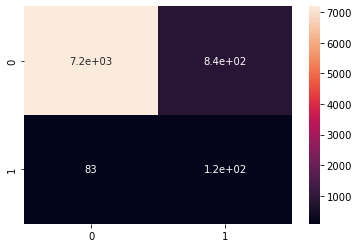

In [105]:
# create a confusion matrix for the testing set
#confusion_matrix(mlp.predict(testing_feat), testing_targ)

cm2 = confusion_matrix(mlp.predict(testing_feat), testing_targ) #plot confusion matrix
print(cm)
sns.heatmap(cm2, annot = True)



In [106]:
features_and_target.head()

,age,job,marital,education,month,duration,yBinary
0,56,3,1,0,0,261,0
1,57,7,1,3,1,149,0
2,37,7,1,3,0,226,0
3,40,0,1,1,0,151,0
4,56,7,1,3,0,307,0
